![alttext](logo.png)

### Team Tomato: Gustavo Morales - Eduardo López
### Generación :  G10
### Profesores : Bernarda Rodríguez - Yanina 
### Fecha : Lunes 4 de Noviembre 2019

☑ Hito 1: Preliminares y Aspectos Computacionales.\
☐ Hito 2: Descripción.\
☐ Hito 3: Modelación descriptiva.\
☐ Hito 4: Modelación predictiva.

# Hito 1

# Preliminares 

### Descripción del Problema
Una escuela portuguesa requiere que se identifiquen aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar. 
Además, se requiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno y ver si se pueden abstraer en categorías latentes.

### Objetivo 
Para poder resolver el problema de identificación de alumnos con bajo desempeño académico, se generará un modelo el cual utilizara como base los registros sociodemográficos y conductuales de los alumnos que han sido facilitados por dos escuelas para así poder perfilarlos. 
Así también se generará una clasificación para poder obtener información respecto a la batería de preguntas realizada al alumno sobre aspectos ambientales.

* Modelo

    Según nuestro vector objetivo se utilizaran todos los regresores para luego definir mediante correlación que variables si son fundamentales para nuestro modelo.

    $G1 = \beta_0 + \sum_{j=1}^{N}{\beta_j * X_ij + \varepsilon_i}$

    $G2 = \beta_0 + \sum_{j=1}^{N}{\beta_j * X_ij + \varepsilon_i}$

    $G3 = \beta_0 + \sum_{j=1}^{N}{\beta_j * X_ij + \varepsilon_i}$


### Solución
Para resolver este problema se generará un modelo de clasificación ya visto en la sección de dimensionalidad. Para esto se aplicará regresión que ayudara a identificar que alumnos presentan un bajo desempeño académico según que factores. De esta manera es posible aplicar los conceptos de variable dependiente y variable independiente. 
Dado que además se requiere inspeccionar una batería de preguntas se aplicara el concepto de dimensionalidad para generar un modelo de clasificación para dichas preguntas y responder a la duda de que genera mayor o menor confianza al momento de entablarse su desempeño académico.

Finalmente mediante modelación predictiva, se generará un modelo para predecir las notas de G3 (promedio final).

### Métricas de desempeño
Las métricas de desempeño ayudaran a definir si nuestros modelos son eficientes o no.

Antes de presentar todo tipo de soluciones matemáticas se procederá a graficar las variables consideradas relevantes para la solución de este problema. Para esto se aplicarán gráficos tales como:
* Gráfico de cajas
* Mapa de calor o heatmap 

Mediante la interpretación de diversos gráficos se puede poseer una idea o cercanía a como se comportan los datos, así evitando caer en sesgos o malos cálculos.

Para el caso de regresión se utilizarán las siguientes herramientas:
* Test de hipótesis nula
* Nivel de significancia (al 95%)
* p-value
* coeficiente de correlación
* $R^{2}$



Estos elementos se utilizarán debido que son necesarios para medir la eficacia de una regresión. 

El test de hipótesis nula ayuda a presentar una propuesta según la información obtenida, es decir, determinar si la representación es correcta hasta que se demuestre lo contrario. 


El nivel de significancia se aplicará para definir los limites extremos de los resultados obtenidos y de esta manera saber si se rechazara o no la hipótesis nula. Para medir esto de mejor manera se utilizará el p-value.


El coeficiente de correlación determina que variables presentan correlación entre sí, de esta manera es mas sencillo definir variables significativas para el modelo y cuales presentan un mayor impacto.


Finalmente, el $R^{2}$ definirá la probabilidad de que nuestra variable dependiente varié según la o las variables independientes ajustadas en el modelo.



#### Metricas de desempeño para dimensionalidad
Para la dimensionalidad, en este caso aplicable a nuestro set de preguntas, y medir que tan eficientes son nuestros factores. Se utilizarán las métricas de:
* Esferacidad de Bartlett
* Prueba de Kaiser-Meyer-Olkin 

La esferacidad de Bartlett busca medir mediante la prueba de hipótesis nula, si nuestra matriz de correlaciones es una matriz identidad. Es decir, no existe varianza entre ítems.
Valores menores a 0.05 indican evidencia en contra de la hipótesis nula.

Y la prueba KMO para poder eliminar del set de datos los factores no considerados latentes. 
* Valores mayores a 0.7 -> Considera que existe al menos un factor latente. 
* Valores menores a 0.7 -> Considera que no existen factores latentes.


# Aspectos Computacionales

### Librerias para ingesta y preprocesamiento de datos

Para la ingesta y preprocesamiento de datos se utilizaran las librerias de Numpy y Pandas. 


In [1]:
import numpy as np
import pandas as pd

### Librerias para visualización de datos
Para la visualización de datos se utilizaran las librerias de Matplotlib y Seaborn. 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

Y para definir un estilo estandar se utilizara la base de seaborn

In [3]:
plt.style.use("seaborn")

### Librerias de modelación y evaluación de datos
Ya que se estara trabajando con un modelo de regresión se utilizaran la libreria de Statsmodel formula.

Esta función permite ademas obtener un sumario el del cual se pueden extraer metricas de desempeño, como por ejemplo $R^{2}$.

In [4]:
import statsmodels.formula.api as smf

### Librerias para dimensionalidad 
Para este caso se utilizara el modulo de FactorAnalyzer que contiene todo lo necesario para trabajar problemas de dimensionalidad, y sus respectivos factores a analizar.
También se utilizara la libreria de missingo para detectar valores perdidos al momento comenzar con calculos de dimensionalidad.

In [5]:
import factor_analyzer as factor
import missingno as msgn

### Librerias para Machine Learning
Las librerias a continuación facilitan la creación de un modelo en base a la predicción de un vector objetivo utilizando la regresión lineal.
* Modelo
    * LinearRegression: método que utiliza los minimos cuadrados ordinarios.
* Métricas
    * mean_squared_error y r2_score: métodos para medir desempeño a partir del modelo genereado una vez realizada la predicción.
* Selección
    * train_test_split: método que divide una matriz de manera aleatoria para generar sets de entrenamiento y prueba. 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Funciones en archivo .py
Archivo que contiene todas las funciones a utilizar durante este estudio.

In [7]:
import data_science_funcs as funcs

## Preprocesamiento de datos 

In [8]:
df = pd.read_csv("students.csv")

In [9]:
df.head(2)

,|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences|G1|G2|G3
0,0|GP|F|nulidade|U|GT3|A|4|4|at_home|teacher|co...
1,"1|GP|F|""""""17""""""|U|GT3|T|1|1|at_home|other|cour..."


La información se encuentra en un código que es ilegible de comprender, por lo que se procede a procesar los datos.

In [10]:
df = pd.read_csv("students.csv", sep="|")
df = df.drop(columns = "Unnamed: 0")

Se utiliza el separador de "|" ya que el archivo csv no esta separado por comas. Y se elimina la columna Unnamed: 0 ya que no entrega ningun valor pertinente necesario para el estudio.

In [11]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6


Se convierten en valores NaN los datos de las columnas con los atributos: nulidade, sem validade y zero.

In [12]:
df = df.replace("nulidade", np.NaN)
df = df.replace("sem validade", np.NaN)
df = df.replace("zero", np.NaN)

### Visualización y procesamiento de datos perdidos

Cantidad de datos perdidos por columna en el set de datos.

In [13]:
columnas = df.columns

for col in columnas:
    print(df[col].isnull().value_counts("%"))

False    0.987342
True     0.012658
Name: school, dtype: float64
False    0.992405
True     0.007595
Name: sex, dtype: float64
False    0.989873
True     0.010127
Name: age, dtype: float64
False    0.994937
True     0.005063
Name: address, dtype: float64
False    0.989873
True     0.010127
Name: famsize, dtype: float64
False    0.98481
True     0.01519
Name: Pstatus, dtype: float64
False    0.992405
True     0.007595
Name: Medu, dtype: float64
False    0.987342
True     0.012658
Name: Fedu, dtype: float64
False    0.98481
True     0.01519
Name: Mjob, dtype: float64
False    1.0
Name: Fjob, dtype: float64
False    0.989873
True     0.010127
Name: reason, dtype: float64
False    0.989873
True     0.010127
Name: guardian, dtype: float64
False    0.992405
True     0.007595
Name: traveltime, dtype: float64
False    0.987342
True     0.012658
Name: studytime, dtype: float64
False    0.987342
True     0.012658
Name: failures, dtype: float64
False    0.979747
True     0.020253
Name: schoolsup,

In [14]:
nan_list = []

for col in columnas:
    nan_list.append(df[col].isnull().sum())

Se utiliza libreria missingno para visualizar datos perdidos.

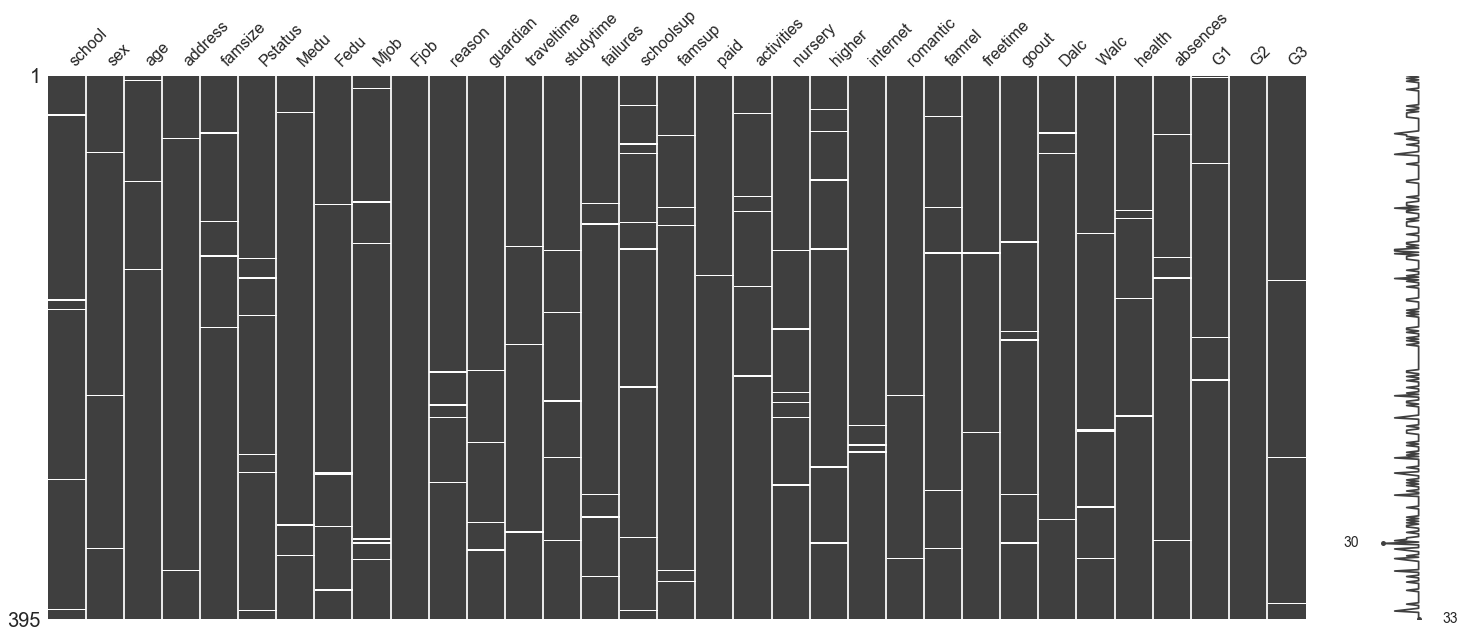

In [15]:
msgn.matrix(df)

Se eliminan los item con valores NaN

In [16]:
df = df.dropna().reset_index(drop = True)
#preguntas_df = trust_df.loc[:, 'A1':'O5']

Dataframe limpio es decir, sin valores perdidos.

* Se eliminaron alrededor de 111 filas.

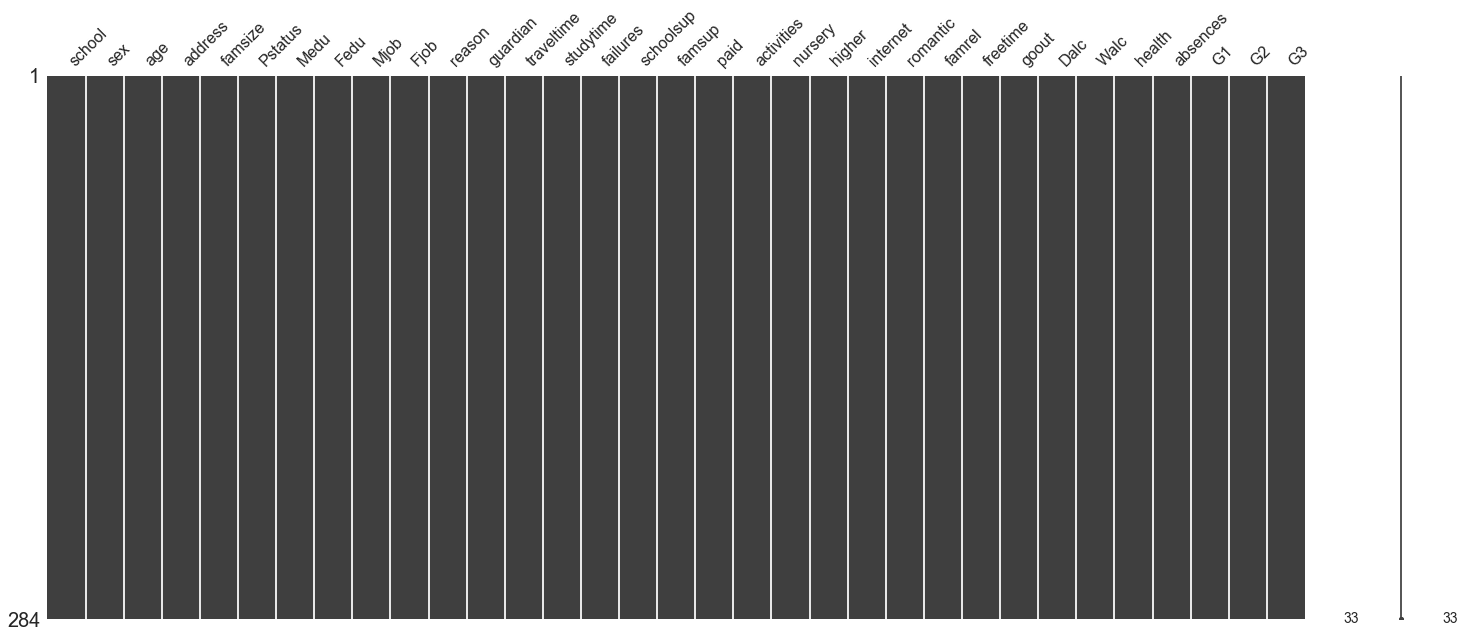

In [17]:
msgn.matrix(df)

### Continuando con el preprocesamiento de datos 

Existen 3 columnas cuyos valores numericos estan registrados como string, por lo que se procede a procesarlos de manera correcta.

In [18]:
funcs.to_string(df, "age")
funcs.to_string(df, "goout")
funcs.to_string(df, "health")

In [19]:
df.head(4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
1,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
2,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
3,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11


Aún los números son cosiderados string, por lo que se parsean para ser tipo entero. 
Para evitar problemas futuros, se procede también a convertir cada valor númerico a su tipo correspondiente.

In [20]:
obj_cols = ["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime",
                "goout","Dalc","Walc","health","absences","G1","G3"]
funcs.to_integer(df, obj_cols)

In [21]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### Binarización de categorias minoritarias 
Para esta sección se analizaran los item categoritos y segun esto definir que variable es minoritaria. Una vez hecho esto se le asignara un 1 a la categoria minoritaria y al resto 0.

Variables a binarizar: 
* school
* sex
* address
* famsize
* Pstatus
* schoolsup
* famsup
* paid
* activities
* nursery
* higher
* internet
* romantic

In [22]:
funcs.binarize_cols(df)

GP    247
MS     37
Name: school, dtype: int64
F    147
M    137
Name: sex, dtype: int64
U    214
R     70
Name: address, dtype: int64
GT3    209
LE3     75
Name: famsize, dtype: int64
T    257
A     27
Name: Pstatus, dtype: int64
no     246
yes     38
Name: schoolsup, dtype: int64
yes    174
no     110
Name: famsup, dtype: int64
no     158
yes    126
Name: paid, dtype: int64
yes    148
no     136
Name: activities, dtype: int64
yes    223
no      61
Name: nursery, dtype: int64
yes    269
no      15
Name: higher, dtype: int64
yes    231
no      53
Name: internet, dtype: int64
no     189
yes     95
Name: romantic, dtype: int64


In [23]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,17,0,0,0,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
1,0,0,15,0,0,0,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
2,0,1,16,0,1,0,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
3,0,1,16,0,1,0,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
4,0,0,17,0,0,1,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6


También se debe realizar este proceso de binarización para variables nominales. 
Para el proceso de variables nominales se deben binarizar todas las categorías menos la mayoritaria para cada columna.

Las variables nominales son:
* Mjob
* Fjob
* reason 
* guardian

In [24]:
nom_list = ["Mjob", "Fjob", "reason", "guardian"]

for i in nom_list:
    print(df[i].value_counts())

other       103
services     68
teacher      44
at_home      43
health       26
Name: Mjob, dtype: int64
other       159
services     80
teacher      21
health       13
at_home      11
Name: Fjob, dtype: int64
course        102
home           78
reputation     77
other          27
Name: reason, dtype: int64
mother    200
father     60
other      24
Name: guardian, dtype: int64


In [25]:
funcs.bin_nom(df, "reason")
funcs.bin_nom(df, "guardian")
funcs.bin_nom(df, "Fjob")
funcs.bin_nom(df, "Mjob")

In [26]:
df = df.drop(columns = ["Mjob", "Fjob", "reason", "guardian"])

In [27]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,bin_guardian_father,bin_guardian_other,bin_Fjob_services,bin_Fjob_teacher,bin_Fjob_health,bin_Fjob_at_home,bin_Mjob_services,bin_Mjob_teacher,bin_Mjob_at_home,bin_Mjob_health
0,0,0,17,0,0,0,1,1,1,2,...,1,0,0,0,0,0,0,0,1,0
1,0,0,15,0,0,0,4,2,1,3,...,0,0,1,0,0,0,0,0,0,1
2,0,1,16,0,1,0,4,3,1,2,...,0,0,0,0,0,0,1,0,0,0
3,0,1,16,0,1,0,2,2,1,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,17,0,0,1,4,4,2,2,...,0,0,0,1,0,0,0,0,0,0


# Hito 2

# Descripción 

### Visualización de datos 
Para esta sección se hará uso de las librerías de visualización como seaborn y matplotlib. 

Como primera instancia se visualizara el comportamiento de nuestros vectores objetivos (G1, G2 y G3) respecto a los atributos en el set de datos.


### Visualización para el primer vector objetivo, G1

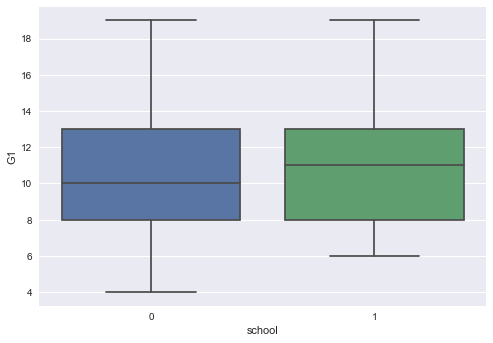

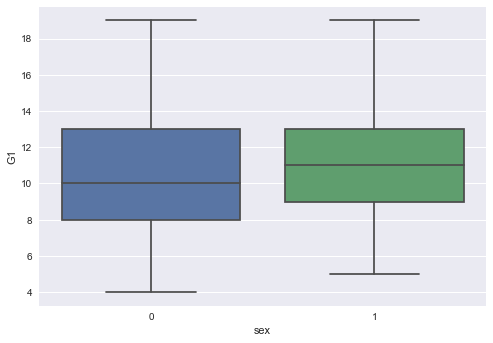

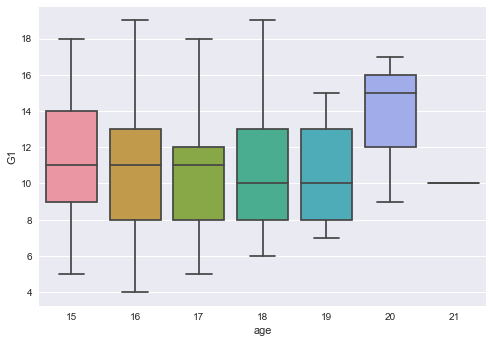

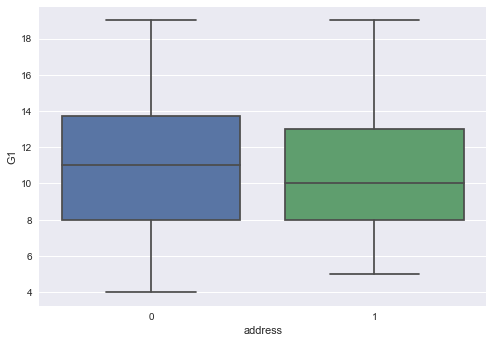

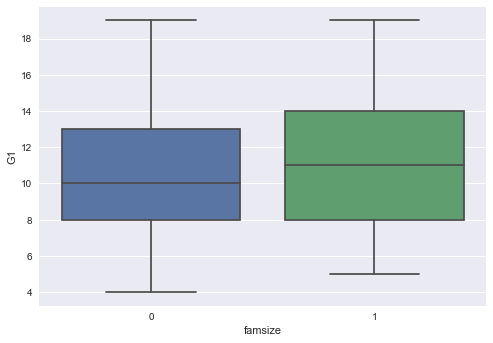

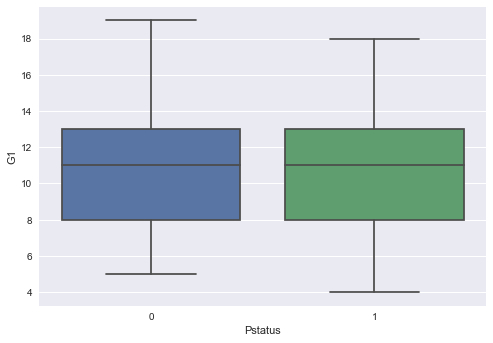

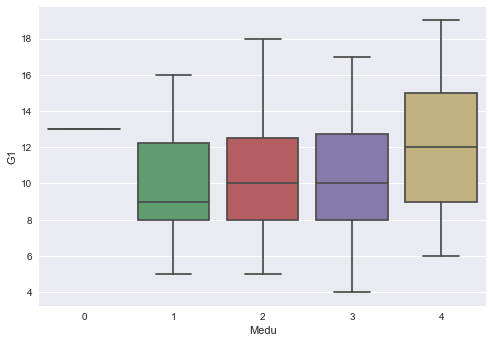

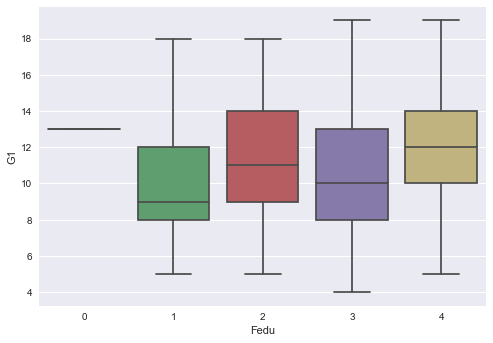

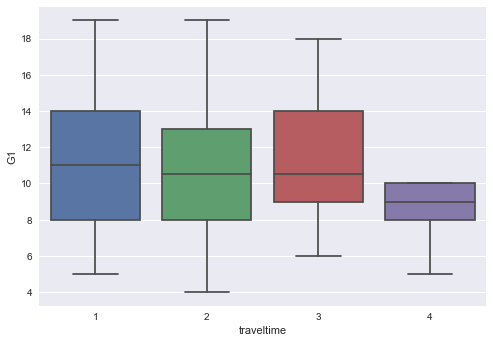

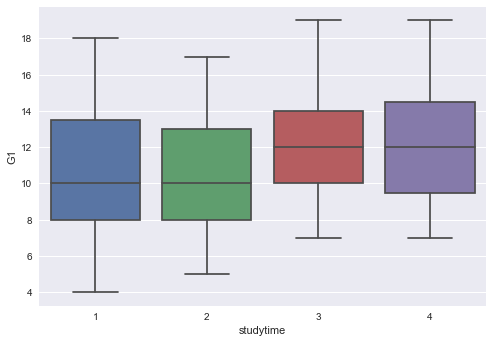

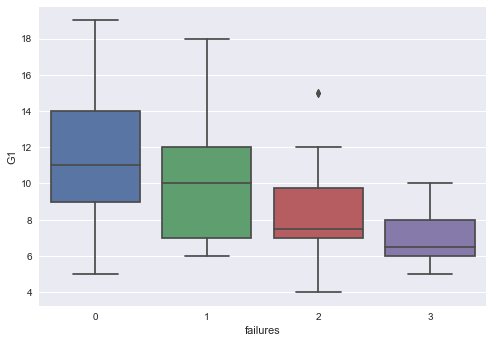

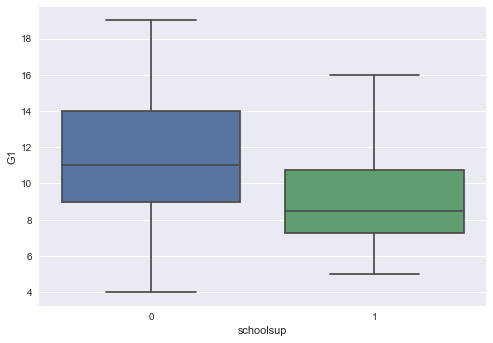

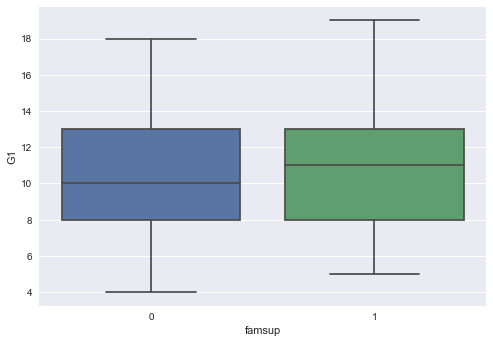

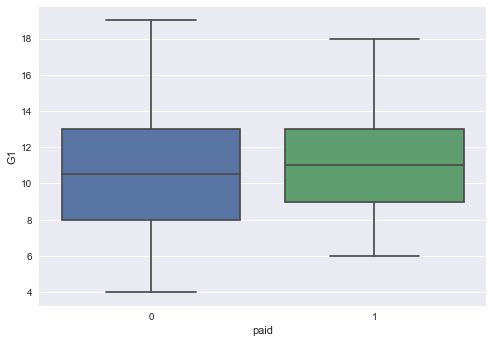

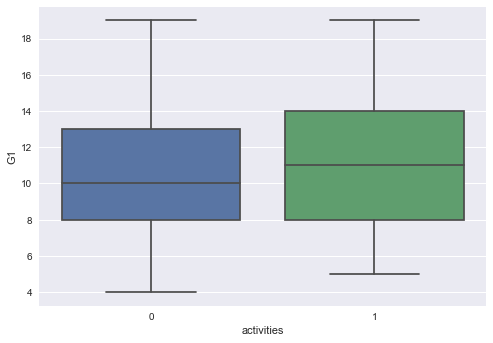

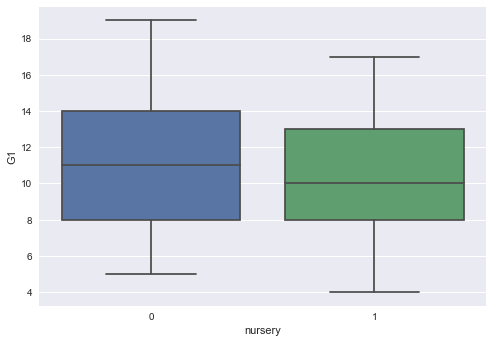

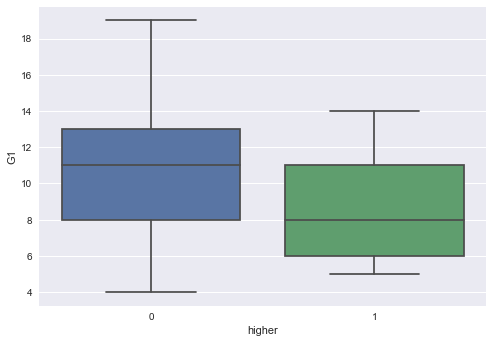

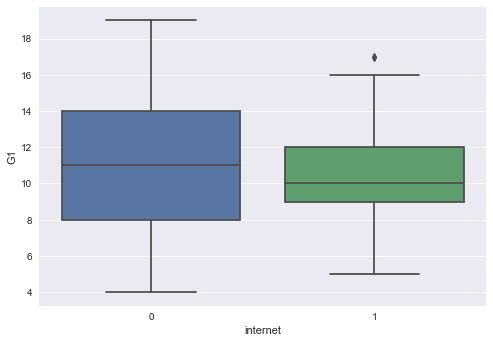

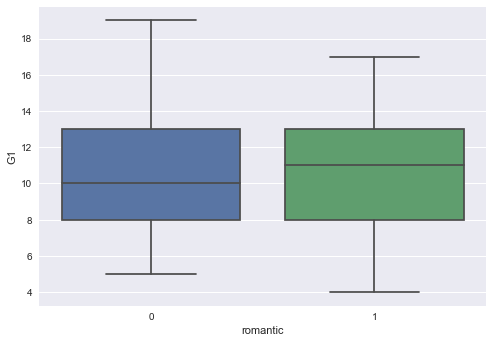

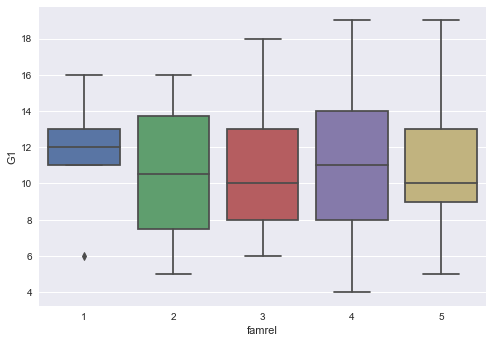

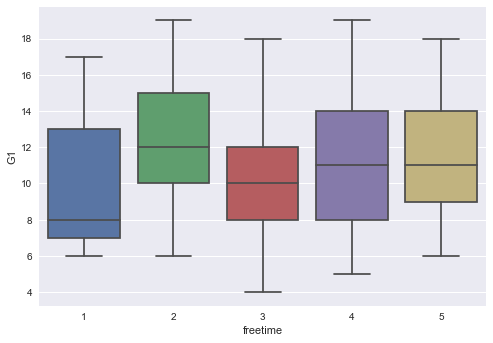

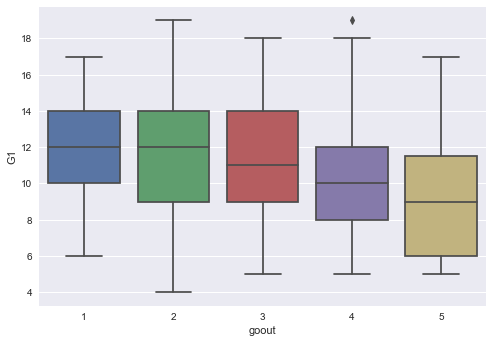

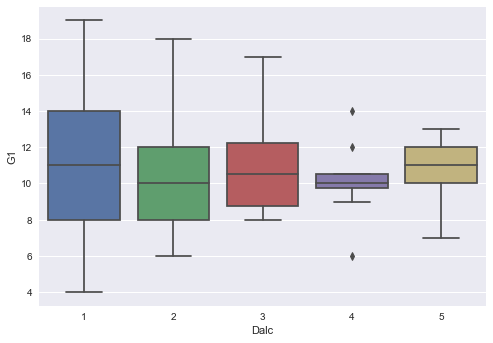

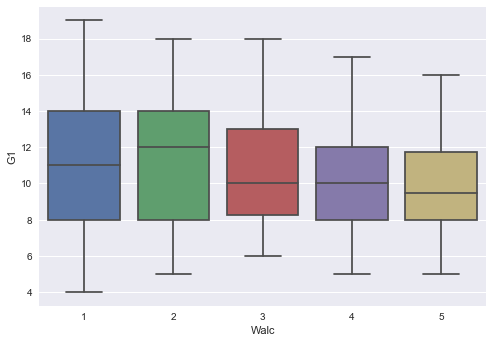

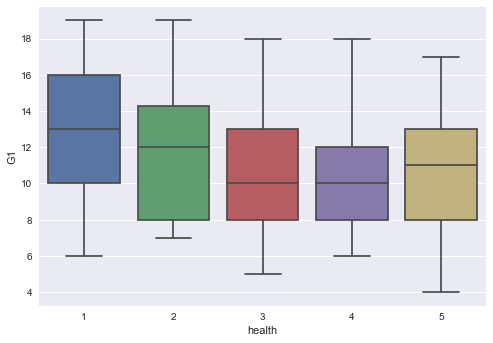

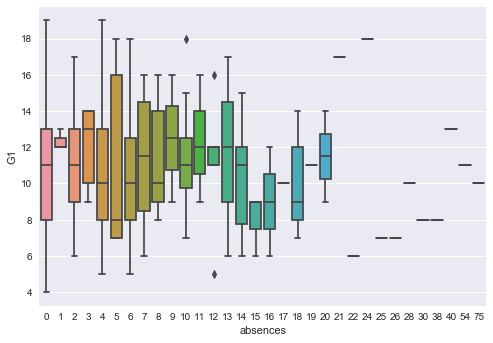

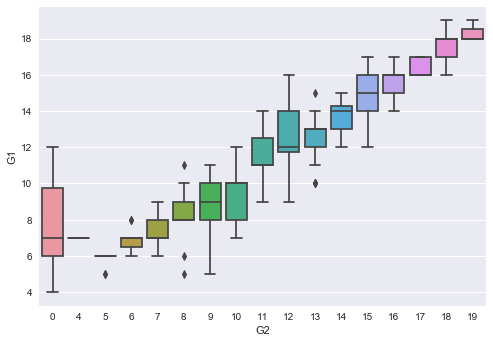

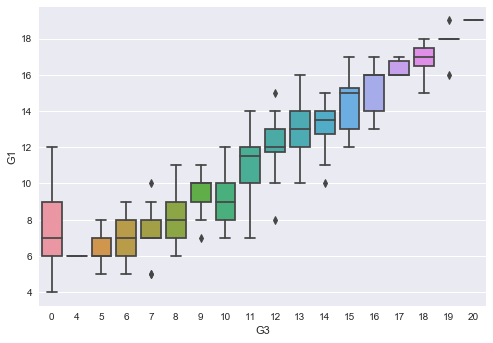

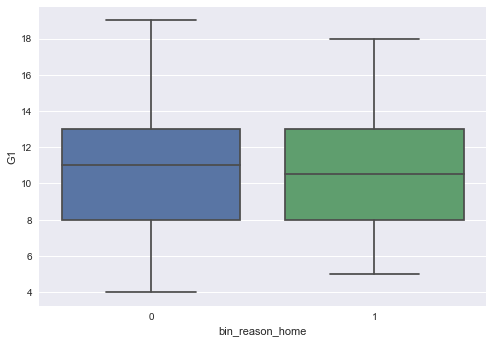

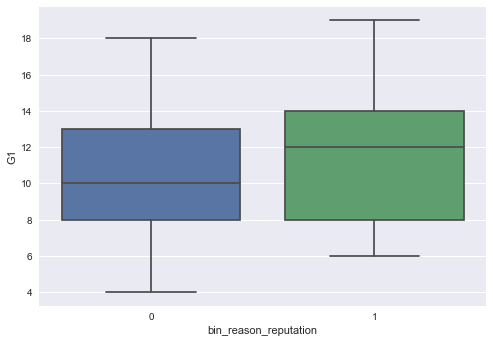

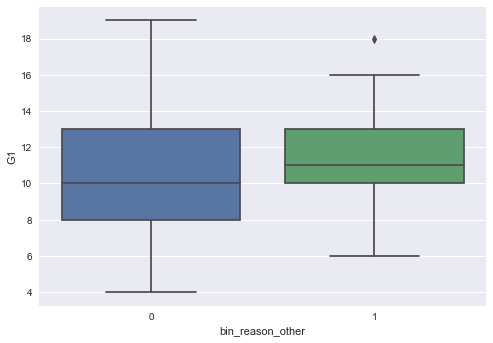

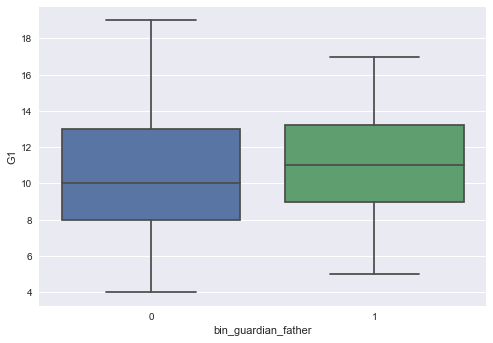

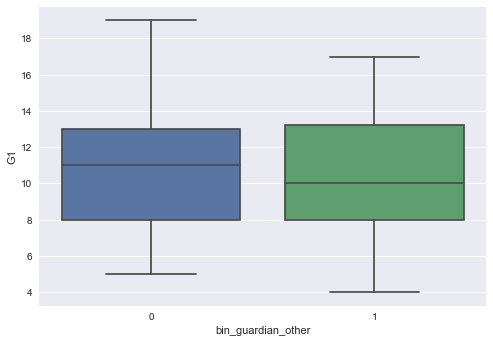

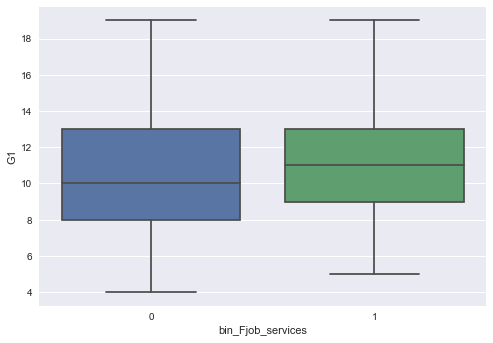

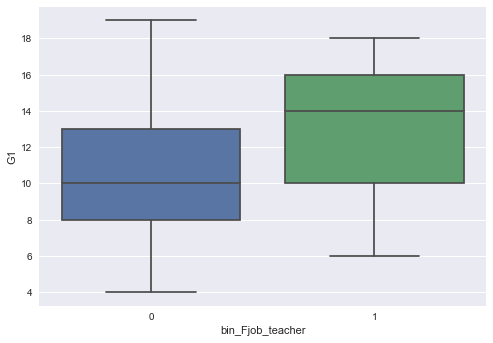

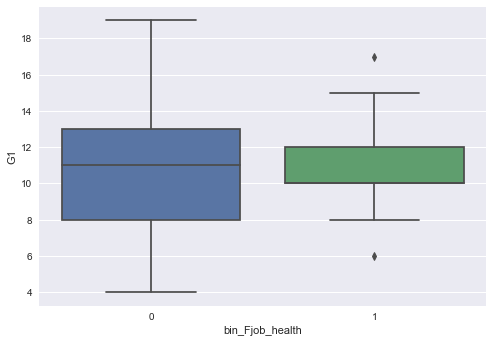

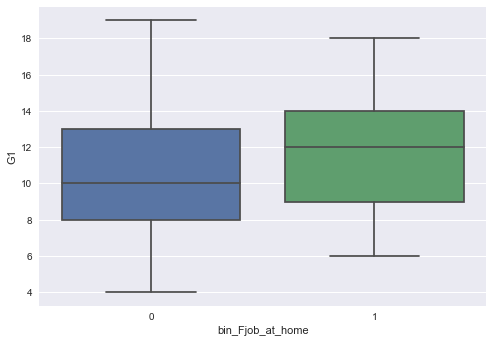

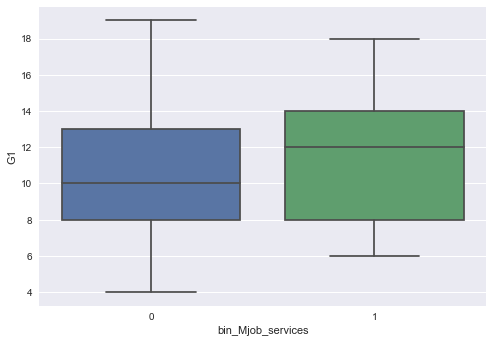

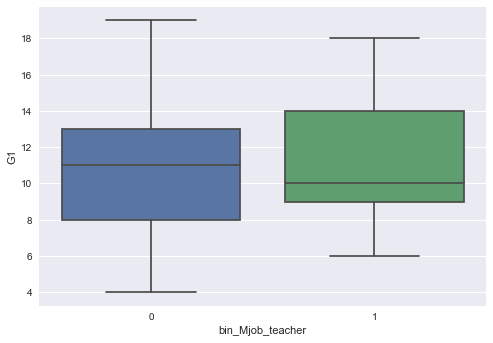

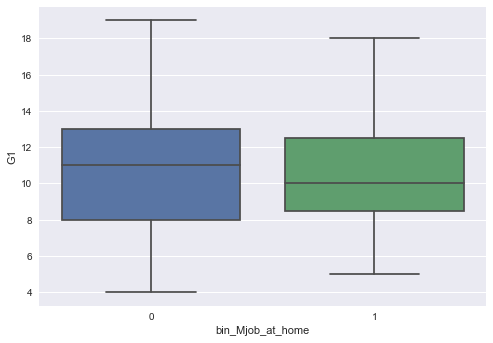

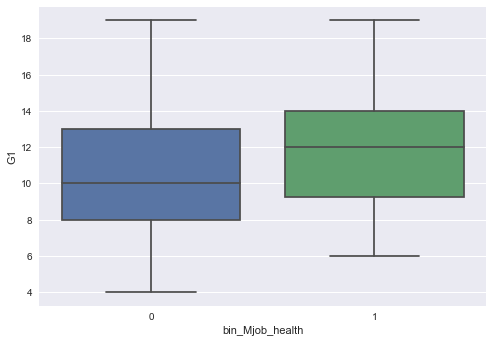

In [28]:
funcs.obj_boxplot("G1", df)

### Visualización para el segundo vector objetivo, G2

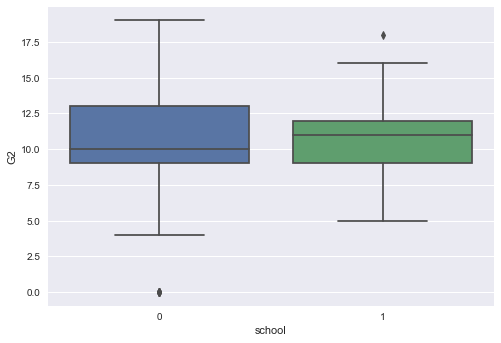

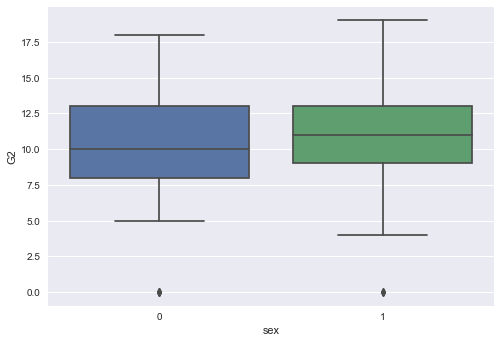

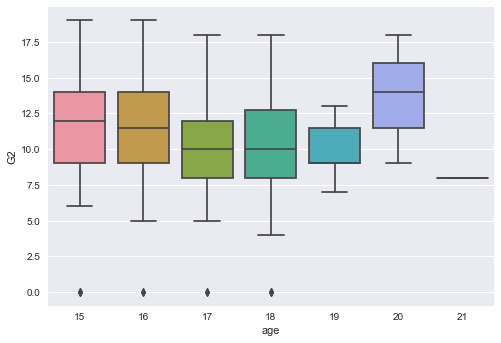

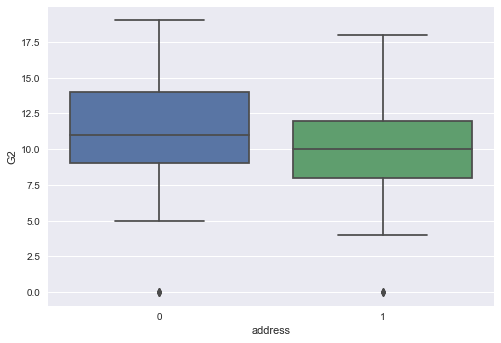

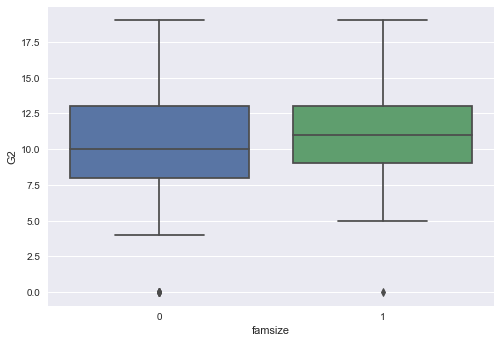

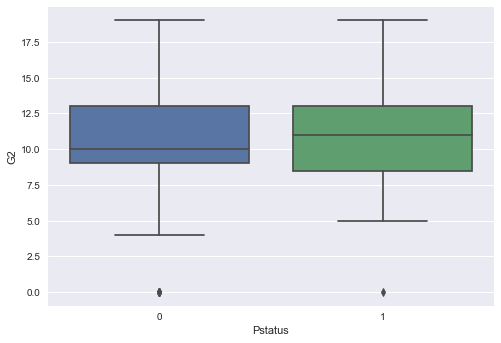

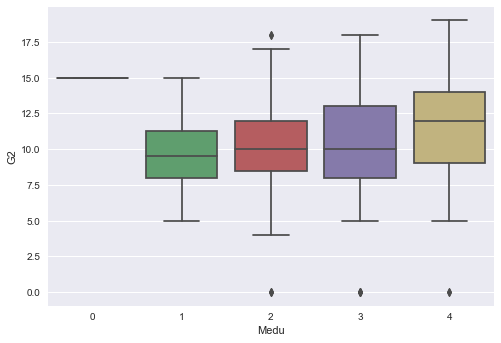

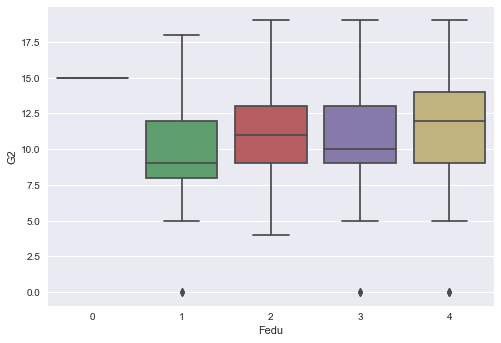

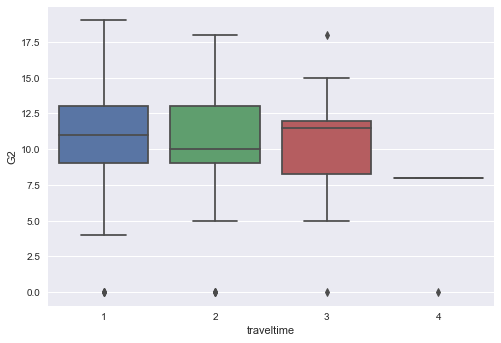

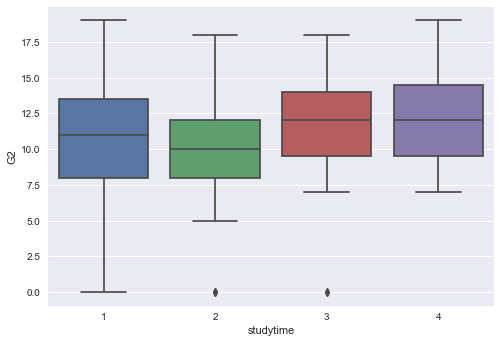

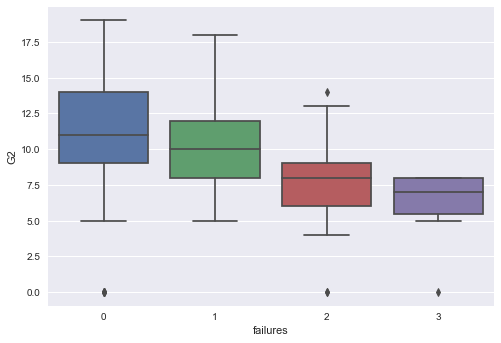

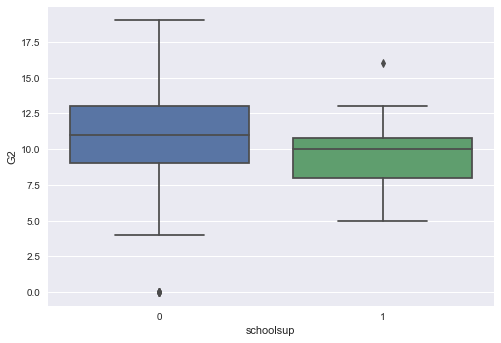

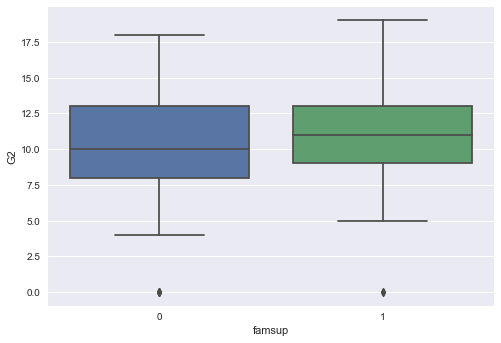

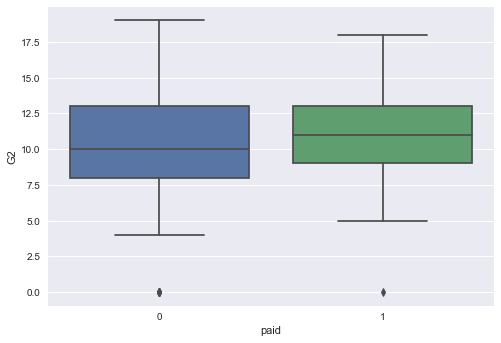

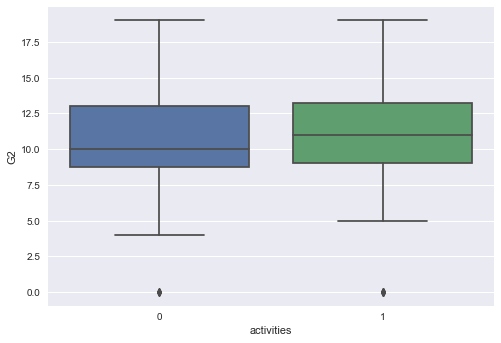

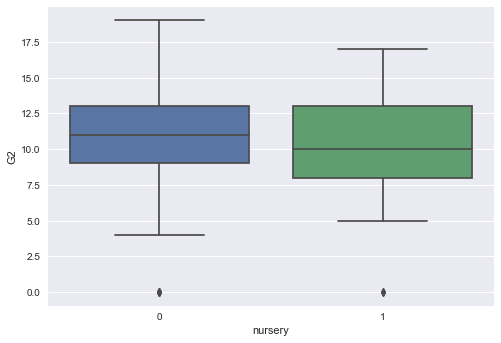

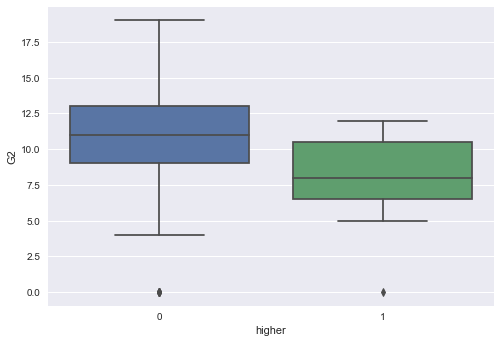

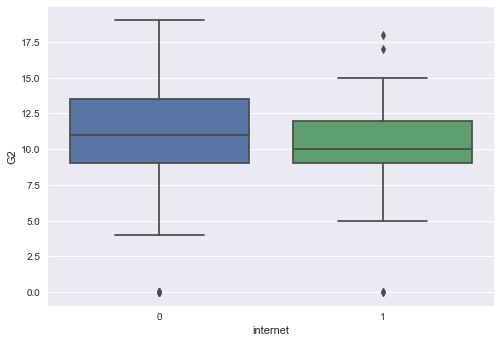

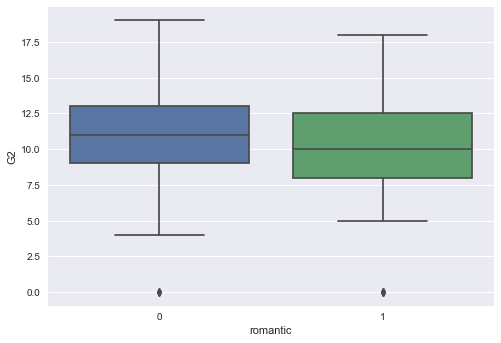

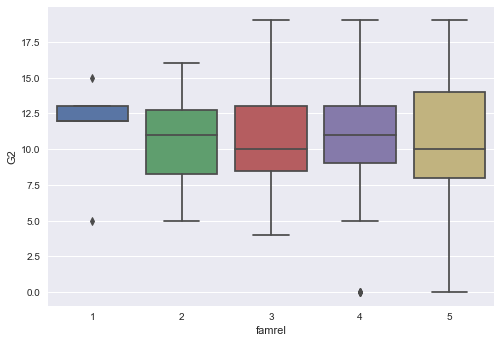

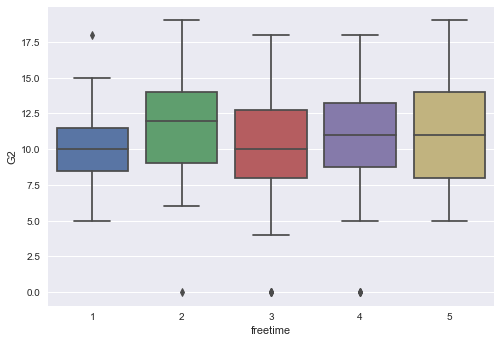

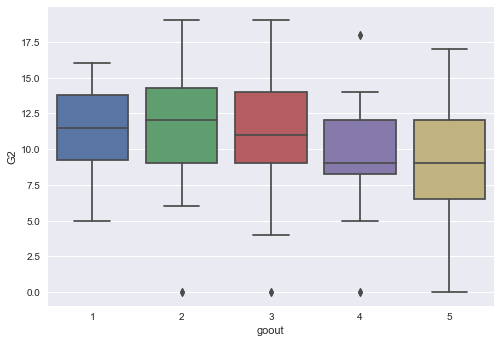

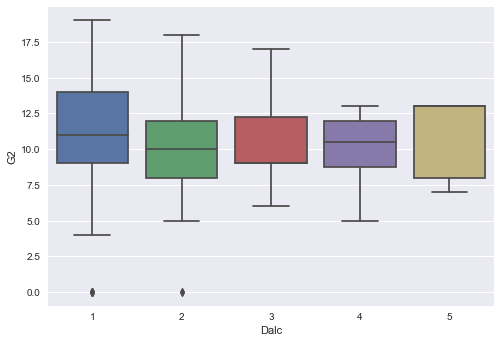

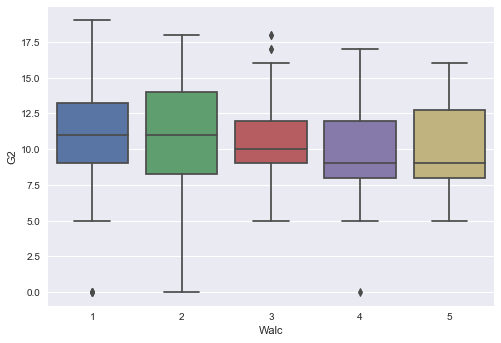

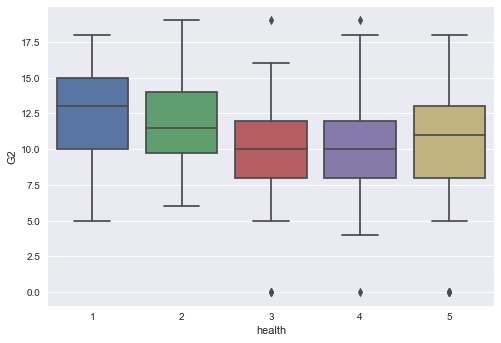

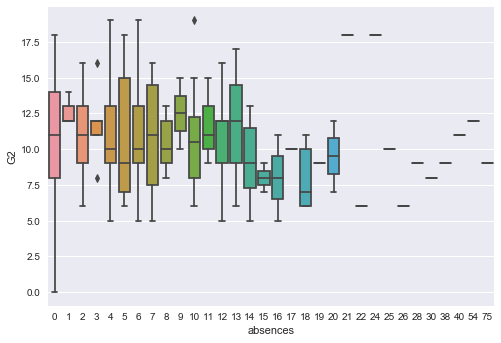

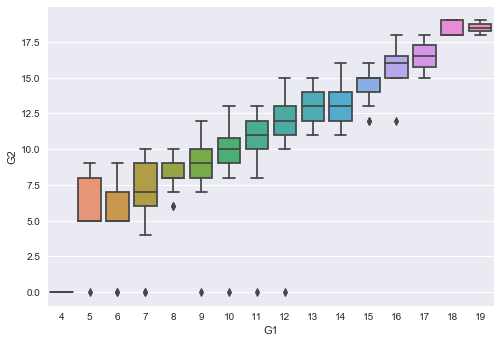

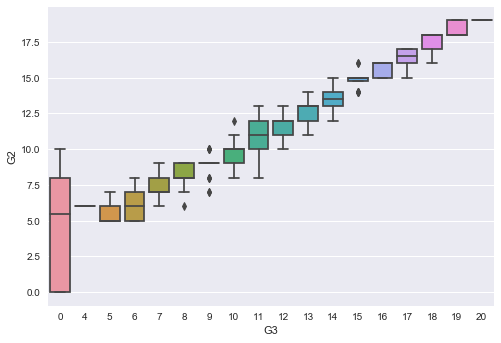

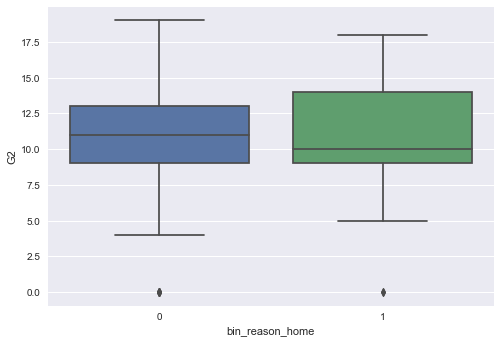

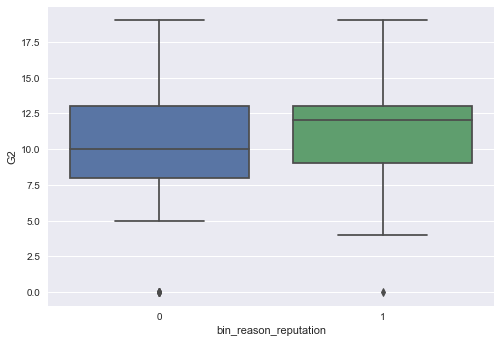

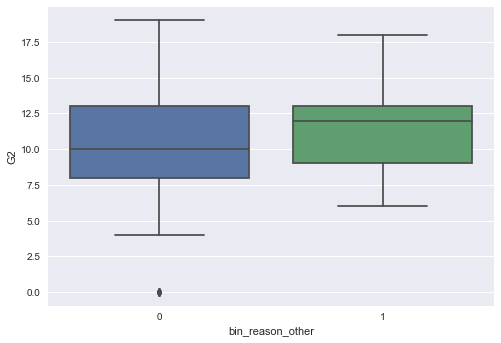

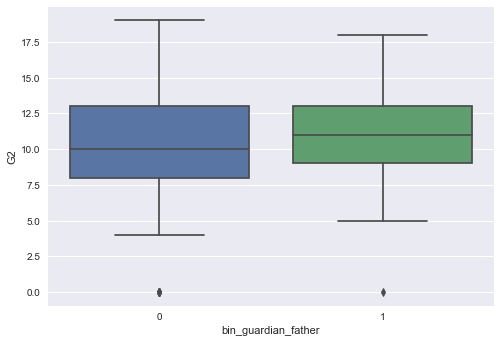

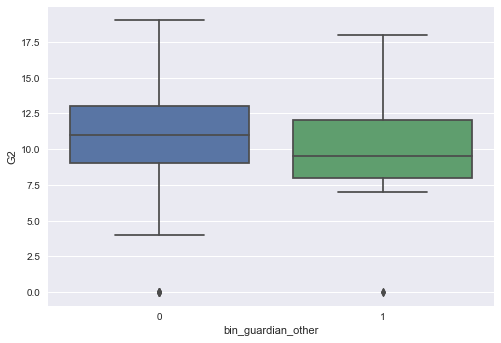

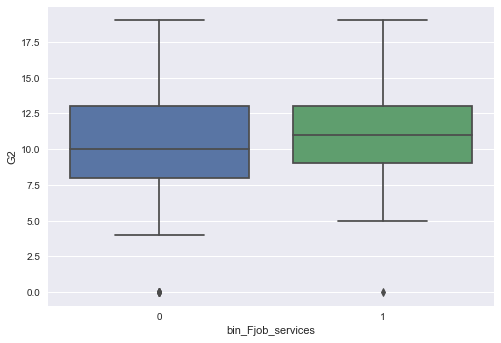

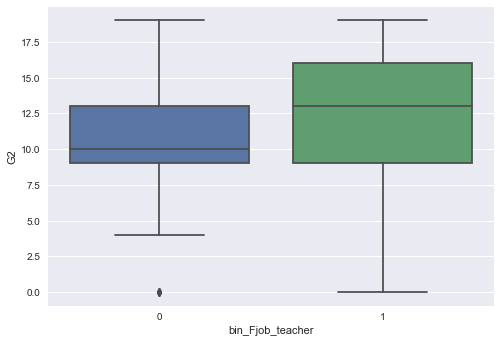

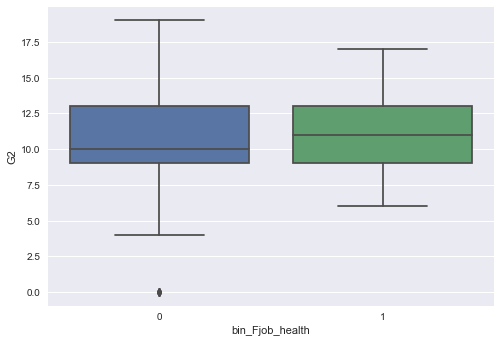

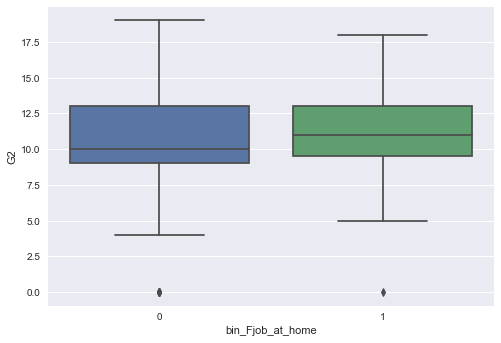

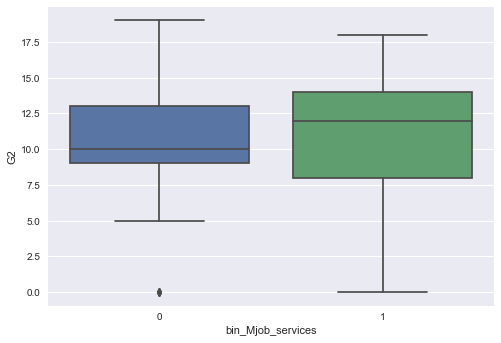

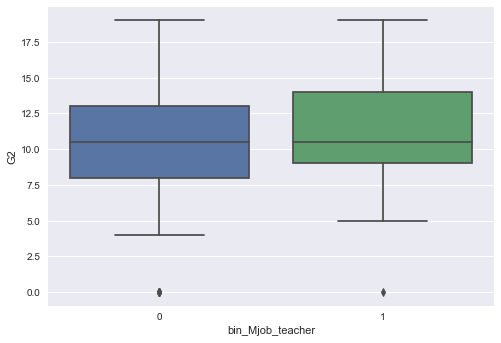

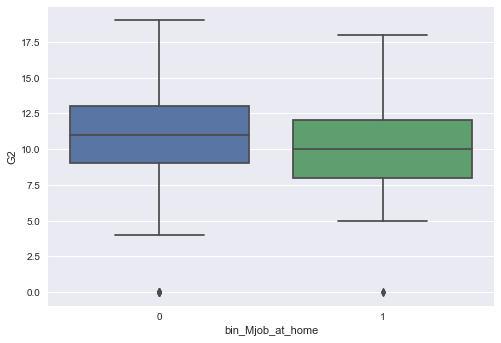

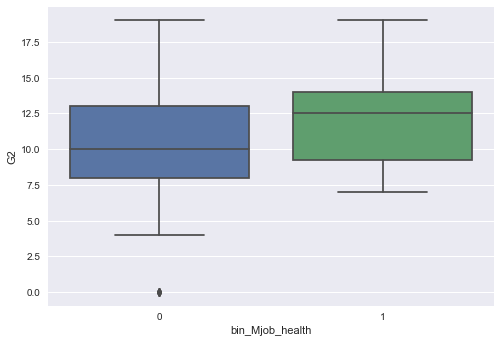

In [29]:
funcs.obj_boxplot("G2", df)

### Visualización para el tercer vector objetivo, G3

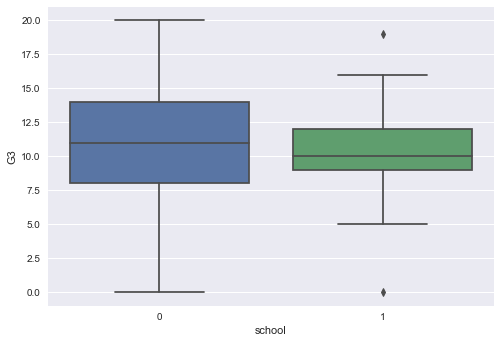

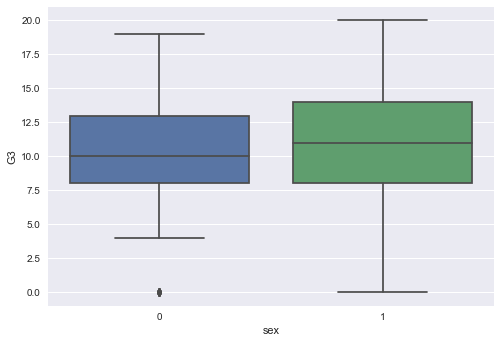

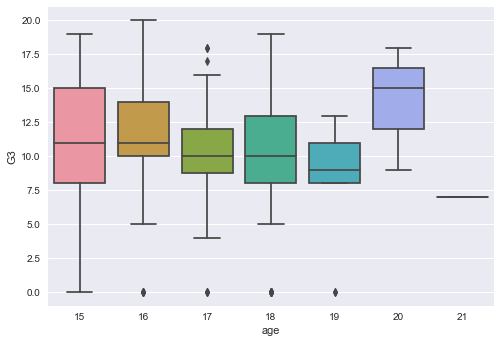

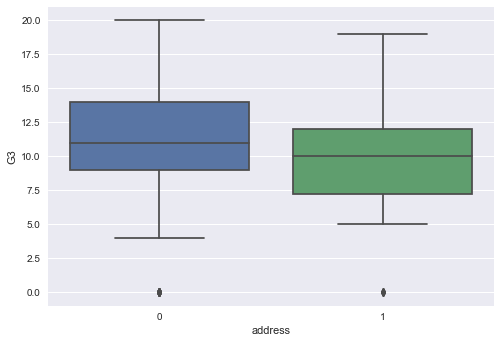

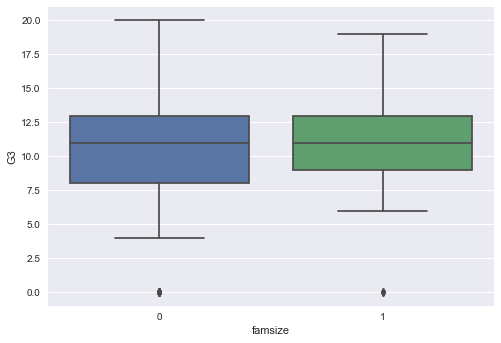

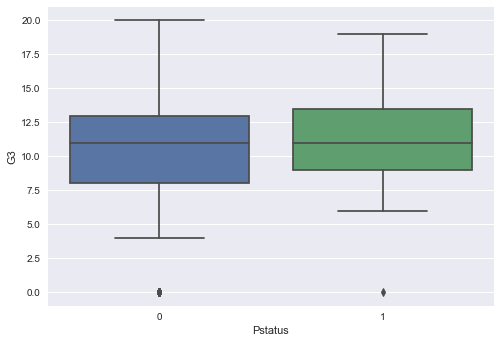

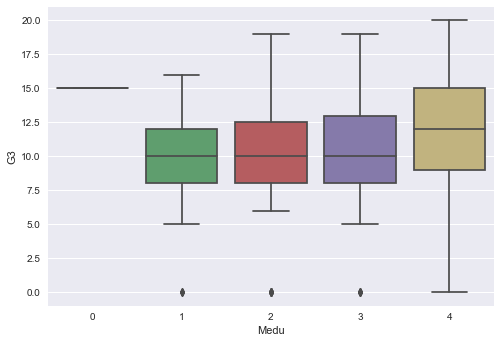

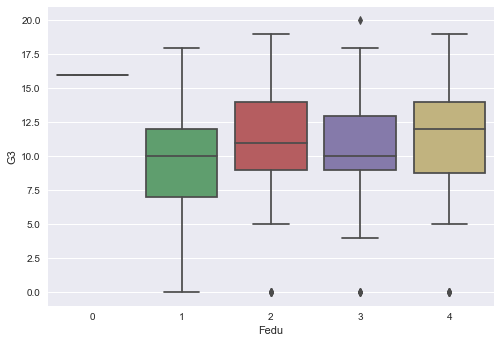

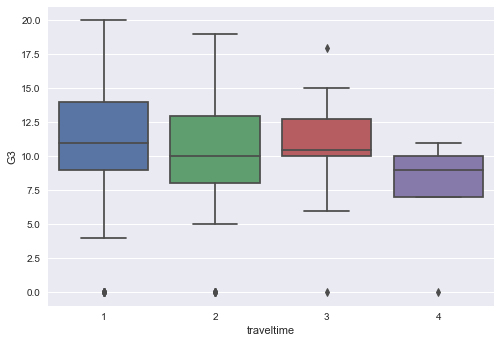

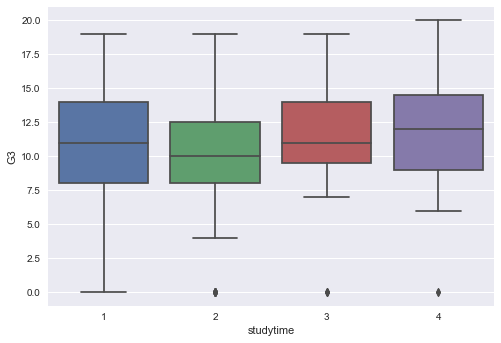

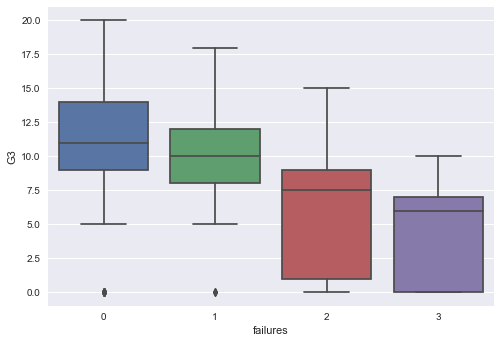

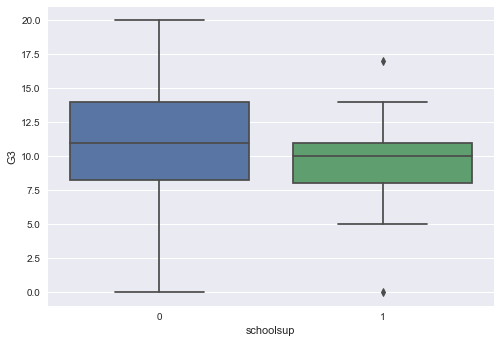

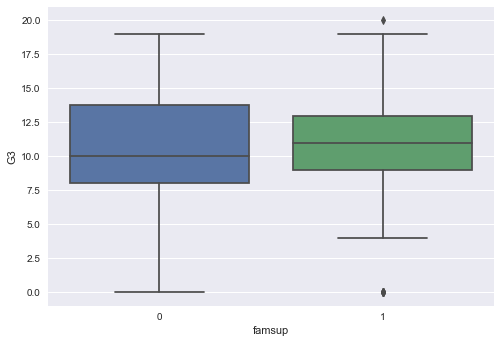

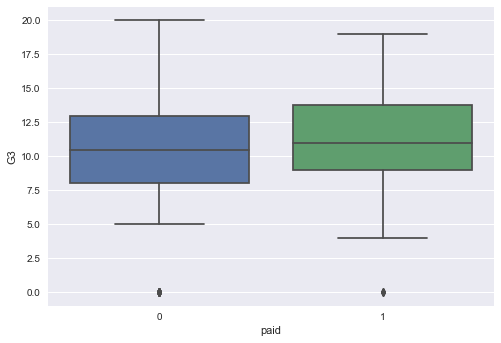

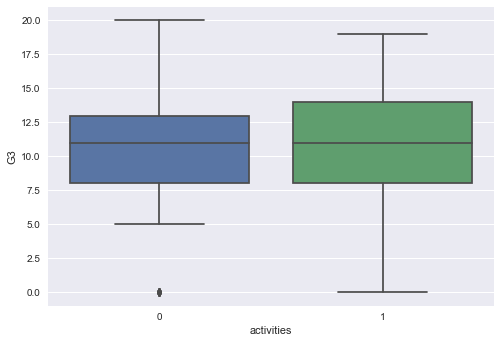

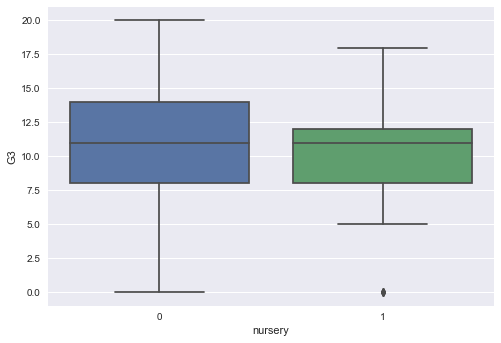

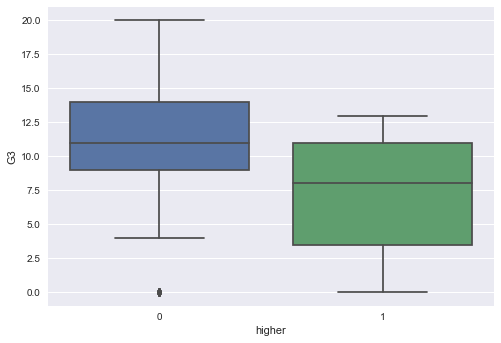

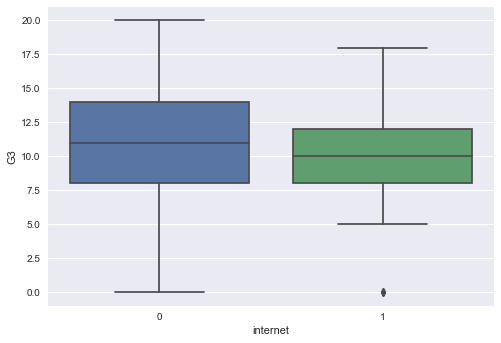

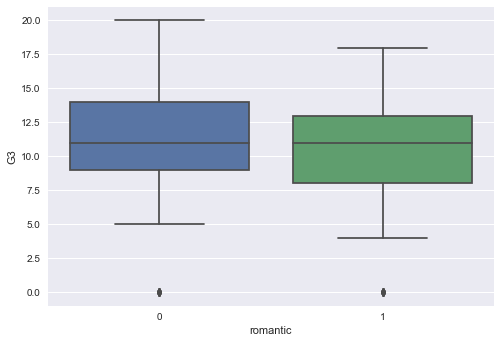

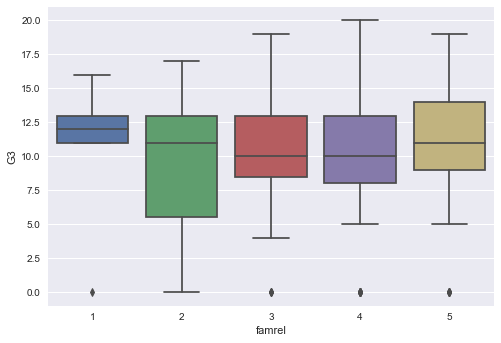

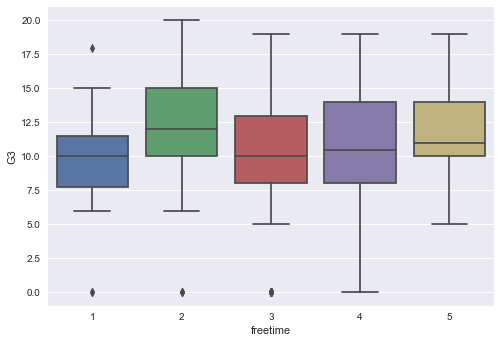

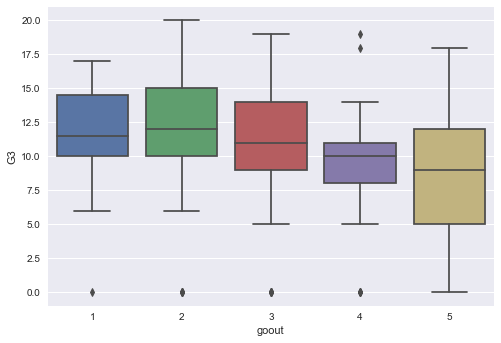

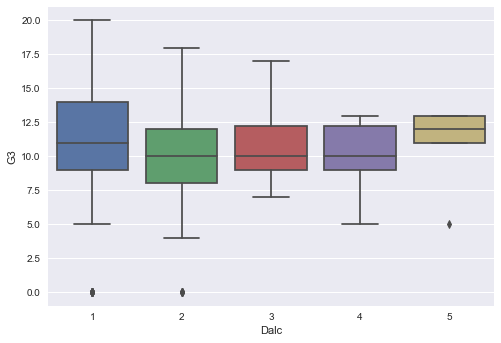

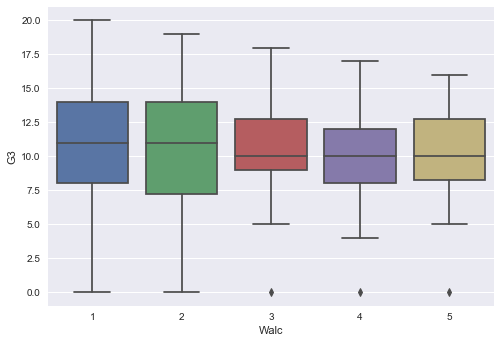

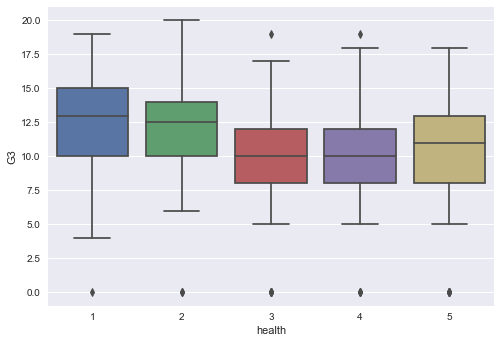

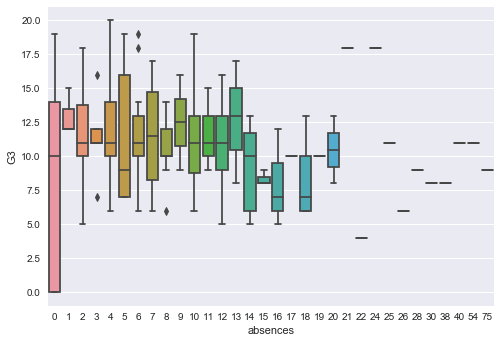

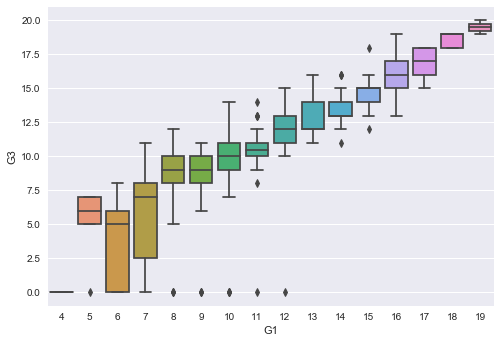

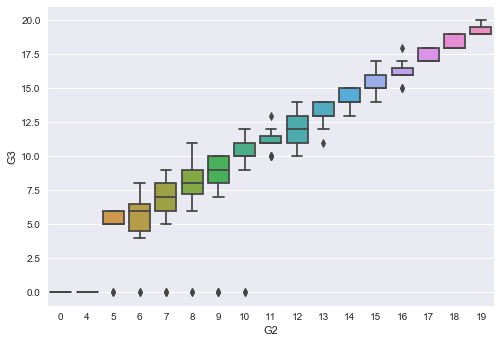

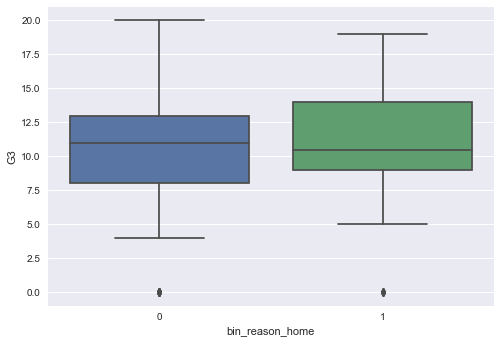

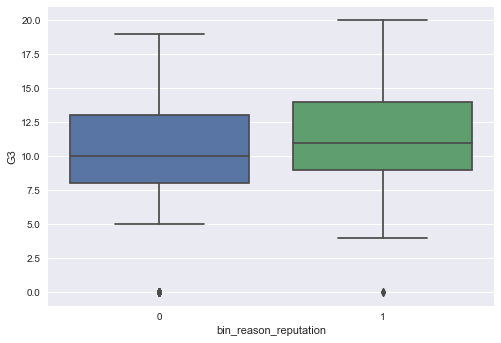

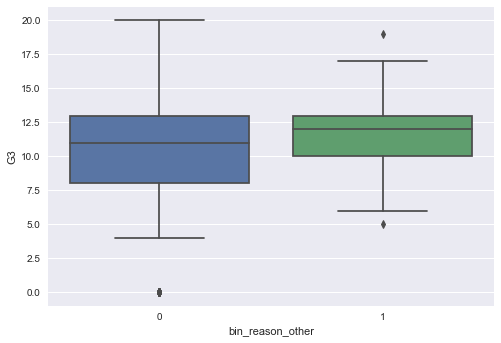

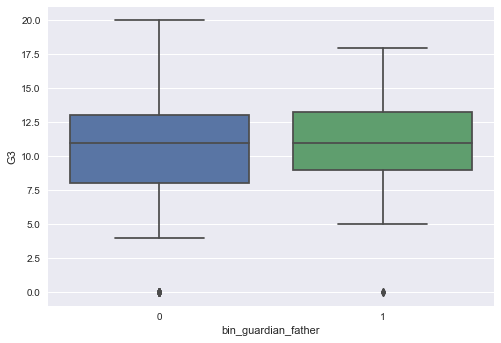

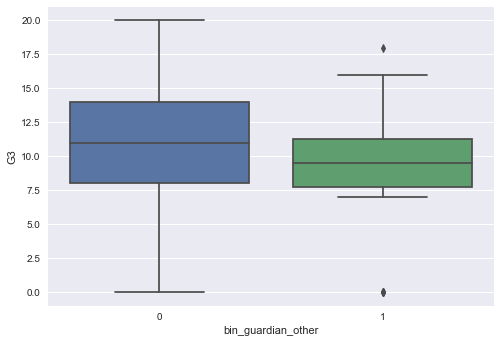

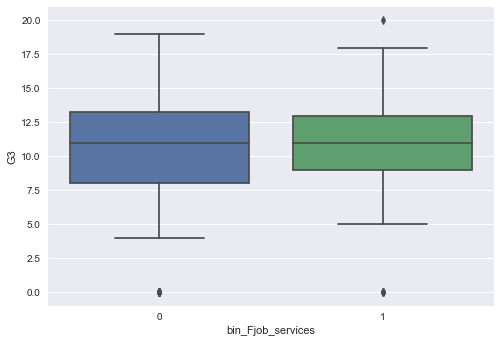

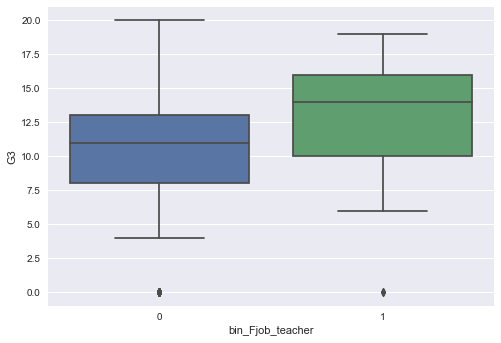

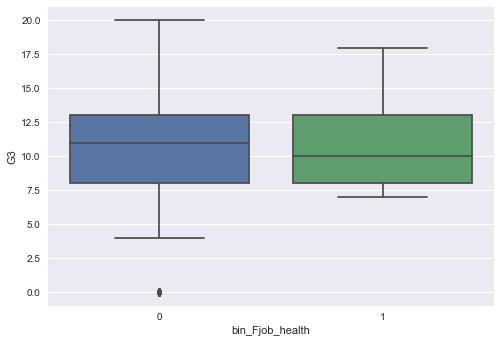

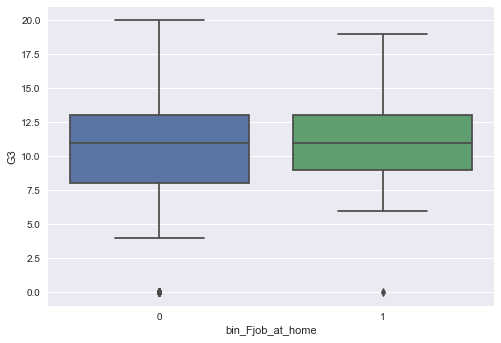

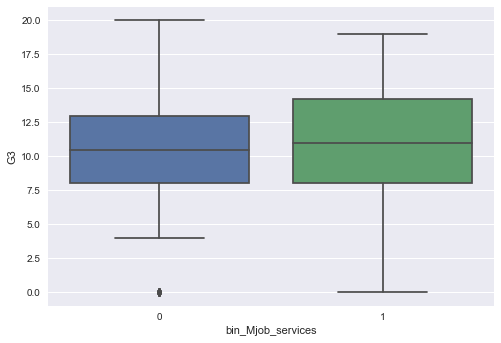

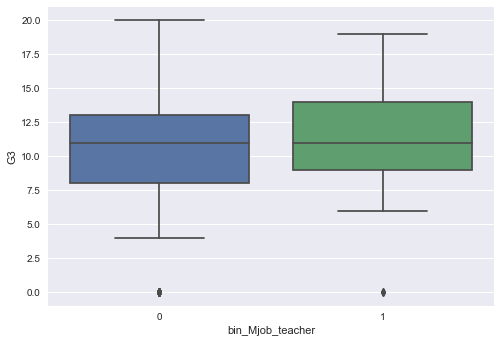

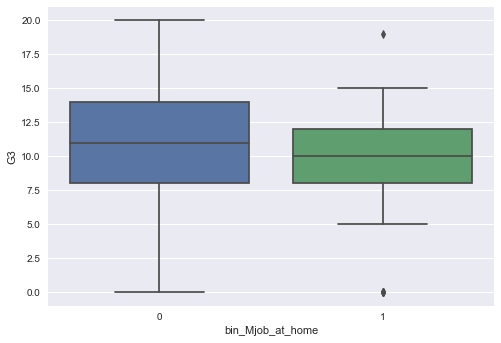

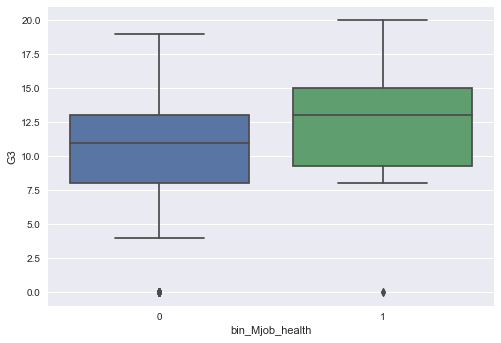

In [30]:
funcs.obj_boxplot("G3", df)

### Interpretación para vectores objetivos según atributos. 
* **Escuela del estudiante**: Un estudiante presenta un mejor desempeño si este asiste al colegio Mousinho da Silveira.
* **Sexo del estudiante**: Un estudiante del genero masculo presenta un mejor desempeño escolar a diferencia del genero femenino.
* **Edad del estudiante**: En promedio un estudiante presenta un mejor desempeño escolar cuando este tiene alrededor de 20 años.
* **Ubicación de la casa del estudiante**: Si la ubicación del estudiante es urbana, este tiende a presentar mejores resultados frente a quienes viven de manera rural.
* **Tamaño de la familia**: Una familia con menos miembros representa un mejor desempeño academico en el estudiante.
* **Estado cohabitacional de los padres**: El estado cohabitacional de los padres no influye en el desempeño del estudiante.
* **Nivel educacional de la madre**: Si la madre del estudiante presenta estudios superiores, el estudiante presentará un mejor desempeño academico.
* **Nivel educacional del padre**: Los estudios del padre tanto para conocimientos de 5to a 9no grado como educación superior, impactaran en el desempeño del estudiante de mejor manera.
* **Tiempo de viaje entre hogar y colegio**: Si el estudiante viaja alrededor de 1 hora, este presentara malos resultados en su desempeño academico.
* **Horas semanales dedicadas al estudio**: Si el estudiante dedica alrededor de 10 horas al estudio, este presentará un mejor desempeño academico.
* **Número de clases reprobadas**: Mientras menos clases reprobadas presente el alumno, mejor sera su desempeño academico.
* **Apoyo educacional del colegio**: Si el colegio entrega apoyo educacional, el desempeño del estudiante puede aumentar en un promedio de 1.5 a su nota final.
* **Apoyo educacional familiar**: Si bien esto es importante, según los datos para estos estudiantes no existe una inmensa representación. Estos se ven afectados en su desempeño academico casi de igual manera con o sin apoyo familiar respecto a la educación.
* **Clases particulares pagadas**: Un estudiante con clases particulares puede aumentar en promedio su nota final en 1.2 puntos.
* **Actividades extracurriculares**: Si el estudiante realiza actividades extracurriculares este puede aumentar en pequeña medida su desempeño, aún así sin realizarlas no se ve mayormente afectado.
* **Asistió a guardería infantil**: En general estudiantes que asistieron o no a una guardia infantil no presentan cambios significativos en su desempeño escolar.
* **Desea proseguir estudios superiores**: Estudiantes que NO desean proseguir con estudios superiores tienden a presentar un desempeño academico mas bajo.
* **Acceso a internet desde el hogar**: Estudiantes con acceso a internet presentan un desempeño academico pequeñamente superior a quienes no poseen.
* **Relación romántica**: No se ve reflejado un cambio significativo en el desempeño academico en estudiantes quienes tienen o no una relación romántica.
* **Calidad de las relaciones familiares**: Una relación familiar catalogada como excelente presenta que el estudiante tiene un mejor desempeño academico.
* **Tiempo libre fuera del colegio**: En promedio un estudiante que posee poco tiempo libre presentara un mejor desempeño academico. 
* **Salidas con amigos**: Mientras menos salidas con amigos existan, el estudiante presentara un mejor desempeño academico.
* **Consumo de alcohol en día de semana**: Mientras menor alcohol durante la semana, mejor sera el desempeño academico del estudiante.
* **Consumo de alcohol en fines de semana**: En general no existen cambios significativos, sin embargo si el rango esta entre beber muy poco o poco en fines de semana, el estudiante presentara un mejor desempeño academico.
* **Estado de salud actual**: Si el estado de salud del estudiante es considerado "normal" su desempeño academico no se vera afectado en gran medida.
* **Cantidad de ausencias escolares**: Un estudiante que falta al colegio 5 o 15 veces es quien presentara un cambio en su desempeño academico de manera significativa. 
G1 y G2 respecto a G3: Las notas en los 2 semestres son directamente proporcionales al promedio final del estudiante. A mejor desempeño en ambos, mejor sera el desempeño del estudiante al final.
* **Razón para escoger escuela - cercano a casa**: Si la escuela se encuentra cerca del estudiante, este presentara un mejor desempeño academico.
* **Razón para escoger escuela - reputación**: Si la reputación de la escuela es buena, el estudiante presentara un mejor desempeño academico.
* **Razón para escoger escuela - otra**: Si la razón para escoger la escuela es otra, de igual manera el estudiante presentara en promedio un aumento en su desempeño academico.
* **Apoderado del estudiante - padre**: Que el padre sea el apoderado del estudiante no afecta en gran medida en el desempeño academico de este.
* **Apoderado del estudiante - otro**: Si el apoderado del estudiante no es ni su padre ni su madre, el desempeño academico se vera afectado provocando una disminución en promedio de 4 puntos a su nota final.
* **Ocupación del padre - administración publica o policía**: El desempeño academico del estudiante no se ve afectado en gran medida.
* **Ocupación del padre - profesor**: Si el padre es profesor, el desempeño academico del estudiante puede aumentar en promedio 3 puntos a su nota final.
* **Ocupación del padre - salud**: El desempeño academico del estudiante no se ve afectado en gran medida.
* **Ocupación del padre - en casa**: El desempeño academico del estudiante no se ve afectado en gran medida.
* **Ocupación de la madre - administración publica o policía**: Si la madre del estudiante presenta este cargo, el desempeño academico del estudiante aumenta en promedio 1 punto.
* **Ocupación de la madre - profesor**: A diferencia de la ocupación del padre como profesor, una madre con este cargo no refleja un desempeño academico significativo en el estudiante.
* **Ocupación de la madre - salud**: Si la madre del estudiante trabaja en el área de salud, el estudiante aumentara su desempeño academico en un promedio de 3 puntos a su nota final.
* **Ocupacion de la madre - en casa**: Si la madre del estudiante no trabaja en el hogar, el desempeño academico del estudiante tiende a ser mejor. 

## Heatmap o mapa de calor
Esta presentación ayuda a visualizar correlaciones entre variables.

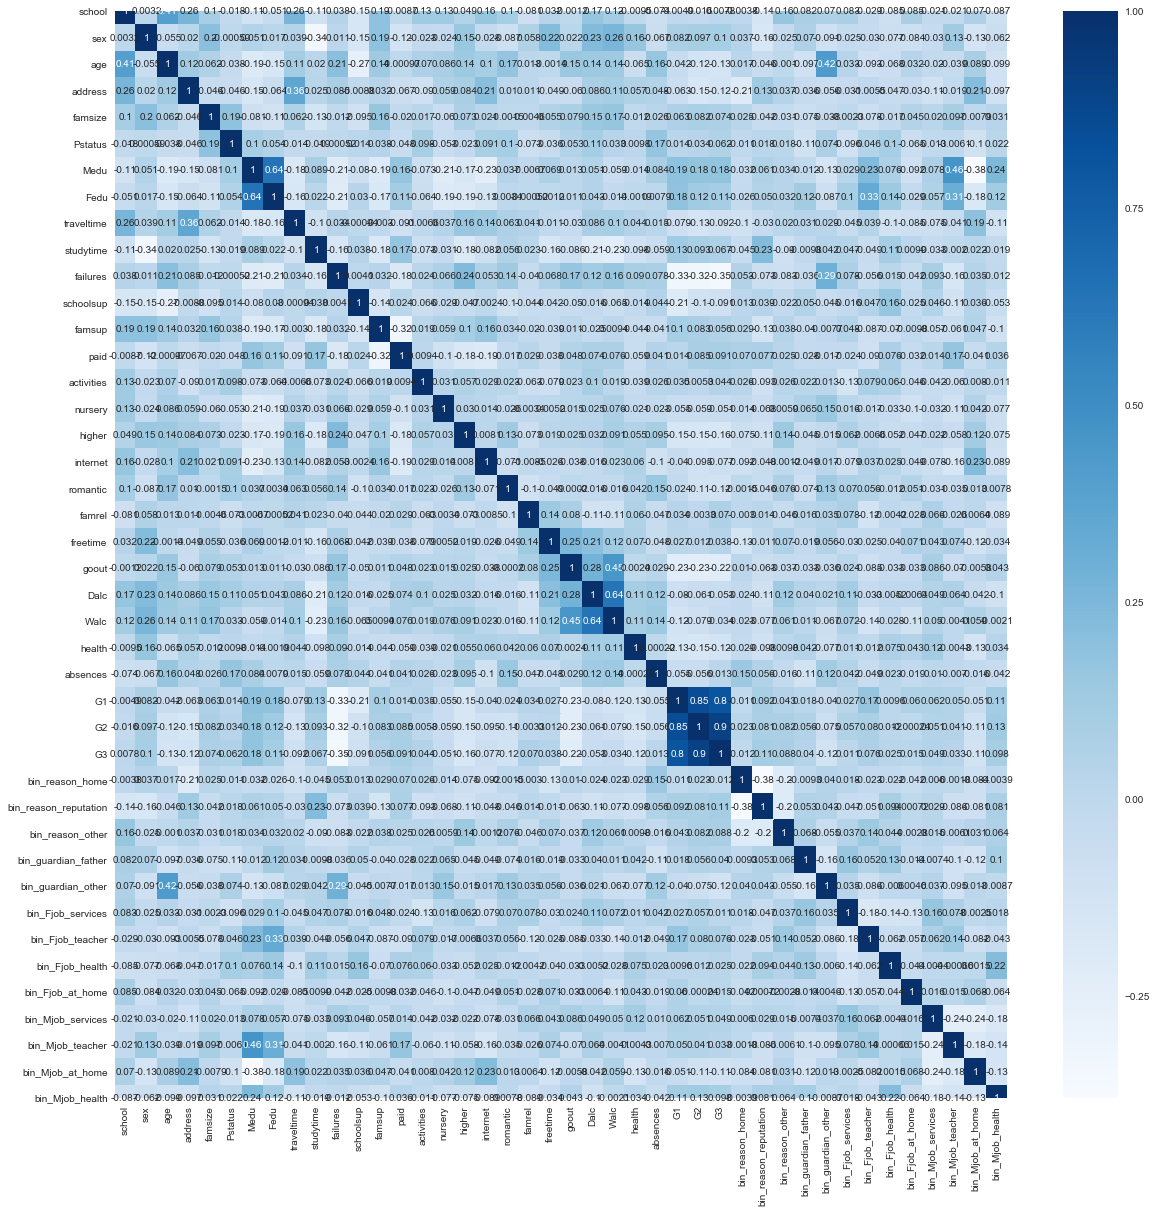

In [31]:
rcParams['figure.figsize'] = 20,20
corr = df.corr()
sns.heatmap(corr, cmap = "Blues", annot = True)

## Interpretación de correlaciones
Con una correlación de 90% se encuentra:
* Notas durante el segundo semestre
* Promedio final 

Con una correlación de 85% se encuentra:
* Notas durante el primer semestre 
* Notas durante el segundo semestre 

Con una correlación de 80% se encuentra: 
* Notas durante primer semestre 
* Promedio final 

`Estas correlaciones tienen sentido ya que el promedio final depende de los resultados obtenidos en los pasados semestres. Como también las notas durante el periodo del segundo semestre dependen del desempeño académico del primero.`

Con una correlación de 64% se encuentra:
* Consumo de alcohol en día de semana 
* Consumo de alcohol en fines de semana 

`Ambas correlaciones apuntan al consumo de alcohol por lo que si es consistente su correlación.`

Con una correlación de 64% se encuentra:
* Nivel educacional de la Madre
* Nivel educacional del Padre

`Ambos atributos buscan representar el mismo valor solo que discretizando por género.`

Con una correlación de 45% se encuentra:
* Consumo de alcohol en fines de semana 
* Salidas con amigos

`Se considera medianamente correlacionado el hecho de salir con amigos y beber alcohol en periodos libres de estudio.`



## Visualización de datos perdidos por columna 

No handles with labels found to put in legend.


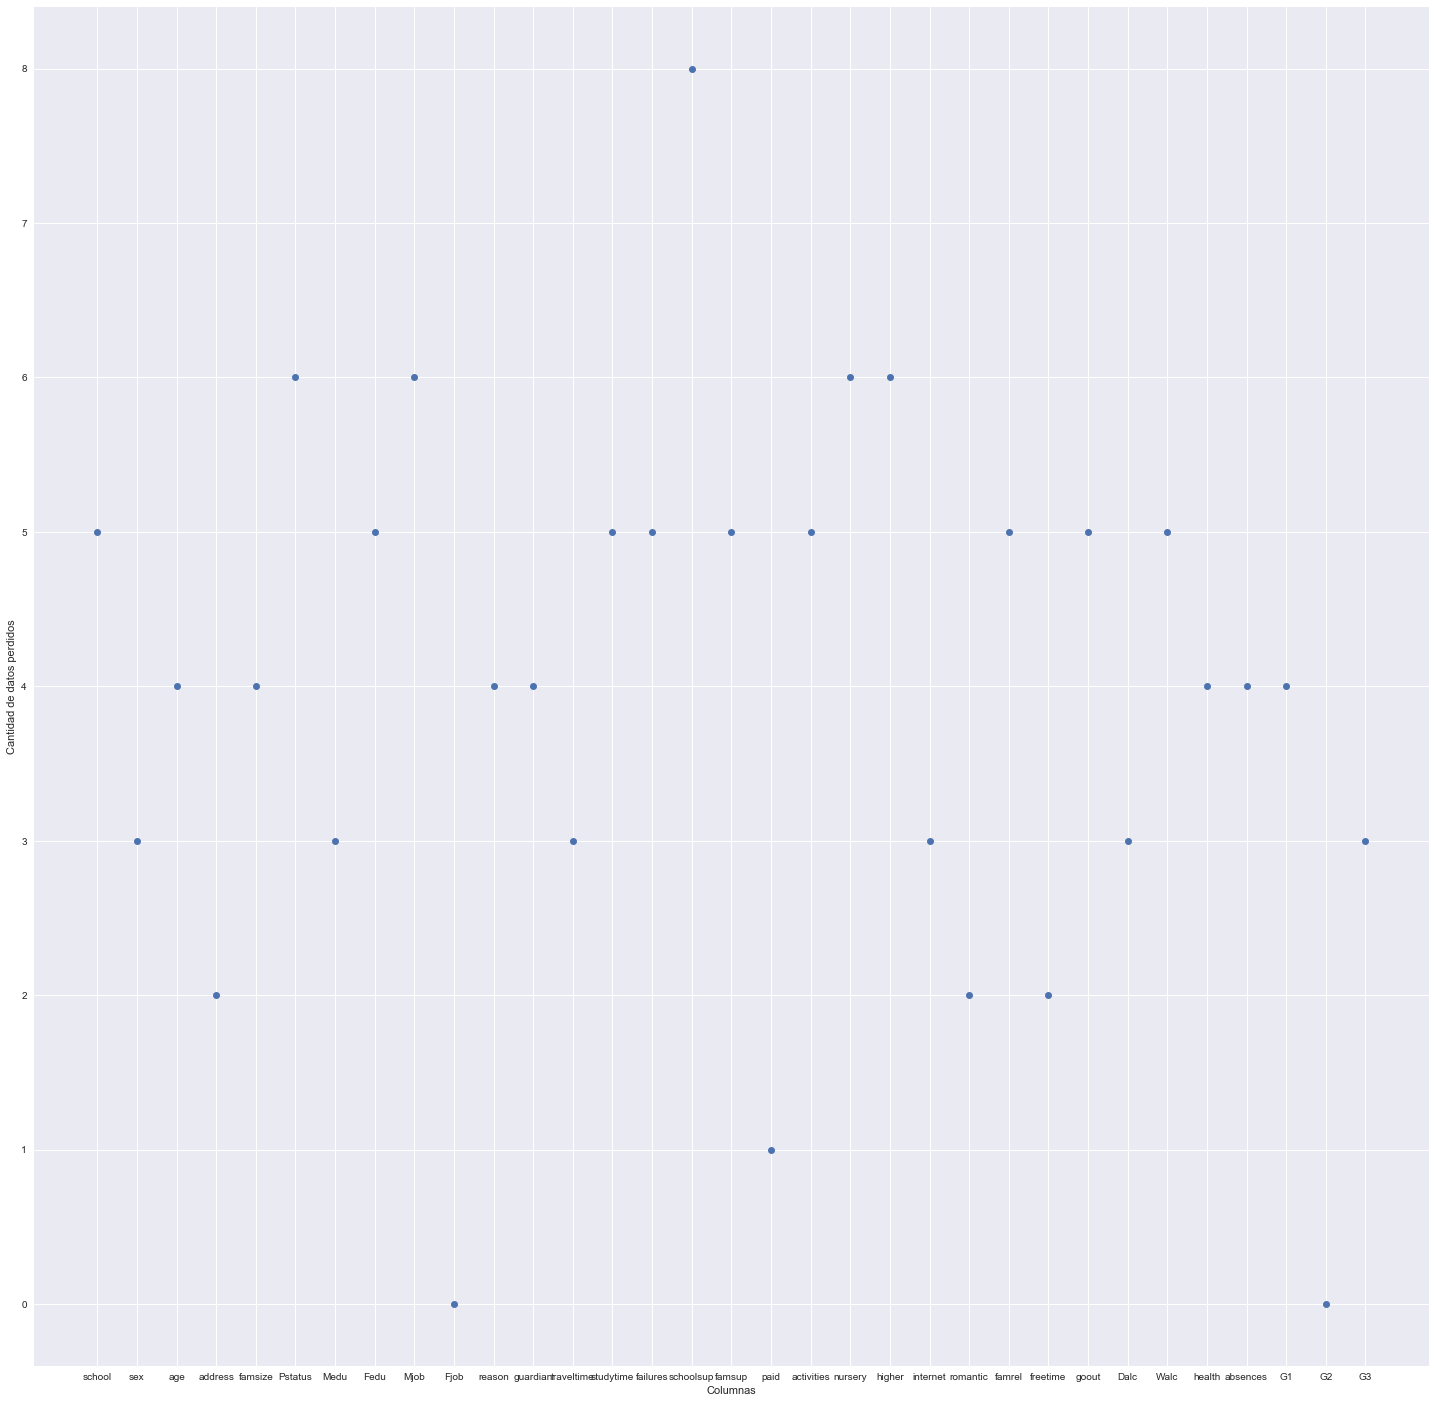

In [32]:
rcParams['figure.figsize'] = 25,25
plt.plot(columnas, nan_list, "o")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de datos perdidos")
plt.legend()

Los datos perdidos por columna no superan los 8 datos, siendo la columna `schoolsup` la que presenta la mayor perdida.

**Durante el hito 1 ya se hizo el preprocesamiento de datos y limpieza de datos perdidos.** 

# ESTO AUN NO CONSIDERAR
#### Regresion Lineal para G1, notas durante el primer semestre. 

In [33]:
model_g1 = smf.ols("G1 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu +\
                    traveltime + studytime + failures + schoolsup + famsup + paid +\
                    activities + nursery + higher + internet + romantic + famrel +\
                    freetime + goout + Dalc + Walc + health + absences + bin_guardian_father +\
                    bin_guardian_other + bin_Fjob_services + bin_Fjob_teacher +\
                    bin_Fjob_health + bin_Fjob_at_home + bin_Mjob_services +\
                    bin_Mjob_teacher + bin_Mjob_at_home + bin_Mjob_health", df)
model_g1 = model_g1.fit()

In [34]:
model_g1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     3.332
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           1.50e-08
Time:                        16:50:29   Log-Likelihood:                -684.41
No. Observations:                 284   AIC:                             1443.
Df Residuals:                     247   BIC:                             1578.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.3658      3.342      2.503      0.013       1.782      14.949
school                 -0.4229      0.652     -0.649      0.517      -1.706       0.860
sex                     0.7364      0.425      1.734      0.084      -0.100       1.573
age                     0.0711      0.184      0.387      0.699      -0.291       0.433
address                 0.0219      0.470      0.047      0.963      -0.903       0.947
famsize                 0.3351      0.437      0.767      0.444      -0.526       1.196
Pstatus                 0.1713      0.647      0.265      0.791      -1.103       1.446
Medu                    0.1689      0.279      0.605      0.546      -0.381       0.719
Fedu                    0.1582      0.235      0.673      0.501      -0.305       0.621
traveltime             -0.0369      0.289     -0.128      0.898      -0.605       0.532
studytime               0.5361      0.243      2.210      0.028       0.058       1.014
failures               -1.1251      0.278     -4.048      0.000      -1.672      -0.578
schoolsup              -1.7949      0.561     -3.197      0.002      -2.901      -0.689
famsup                  0.9932      0.409      2.429      0.016       0.188       1.799
paid                    0.0649      0.400      0.162      0.871      -0.722       0.852
activities              0.4417      0.367      1.202      0.230      -0.282       1.166
nursery                -0.0225      0.451     -0.050      0.960      -0.911       0.866
higher                 -1.1888      0.858     -1.386      0.167      -2.879       0.501
internet               -0.1033      0.498     -0.207      0.836      -1.085       0.878
romantic               -0.1109      0.396     -0.280      0.780      -0.892       0.670
famrel                  0.1438      0.212      0.678      0.498      -0.274       0.562
freetime                0.3691      0.189      1.951      0.052      -0.004       0.742
goout                  -0.7769      0.197     -3.947      0.000      -1.165      -0.389
Dalc                   -0.0919      0.283     -0.325      0.746      -0.649       0.466
Walc                    0.1629      0.208      0.781      0.435      -0.248       0.574
health                 -0.3109      0.140     -2.221      0.027      -0.587      -0.035
absences                0.0001      0.024      0.005      0.996      -0.047       0.047
bin_guardian_father    -0.1727      0.475     -0.364      0.716      -1.108       0.763
bin_guardian_other      0.1500      0.777      0.193      0.847      -1.381       1.681
bin_Fjob_services       0.6055      0.469      1.292      0.198      -0.318       1.529
bin_Fjob_teacher        2.2737      0.783      2.905      0.004       0.732       3.816
bin_Fjob_health         0.4707      0.945      0.498      0.619      -1.391       2.332
bin

#### Con nivel un nivel de significancia de 95% se eliminan del modelo atributos cuyo valor $p$ sea  mayor a 0.025.

Dado esto se conservan los siguientes atributos para el modelo utilizando como vector obejtivo G1:
* failures 
* schoolsup
* famsup
* goout
* bin_Fjob_teacher

In [35]:
model2_g1 = smf.ols("G1 ~ failures + schoolsup + goout + famsup + bin_Fjob_teacher", df)
model2_g1 = model2_g1.fit()

In [36]:
model2_g1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     15.20
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           3.30e-13
Time:                        16:50:30   Log-Likelihood:                -706.29
No. Observations:                 284   AIC:                             1425.
Df Residuals:                     278   BIC:                             1446.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.9071      0.568     22.742      0.000      11.790      14.024
failures            -1.3189      0.243     -5.431      0.000      -1.797      -0.841
schoolsup           -1.9953      0.519     -3.846      0.000      -3.017      -0.974
goout               -0.5403      0.165     -3.268      0.001      -0.866      -0.215
famsup               0.6692      0.363      1.842      0.067      -0.046       1.384
bin_Fjob_teacher     1.9143      0.673      2.846      0.005       0.590       3.238
==============================================================================
Omnibus:                        6.186   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.235
Skew:                           0.149   Prob(JB):                        0.120
Kurtosis:                       2.481   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Las variables que influyen directamente en la variabilidad de nuestro vector objetivo, es decir, las notas durante el primer semestre son:
* Número de clases reprobadas
* Apoyo educacional del colegio 
* Salidas con amigos 
* Ocupación del padre : Profesor

#### Regresión Lineal para G2, notas durante el segundo semestre.

In [37]:
model_g2 = smf.ols("G2 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu +\
                    traveltime + studytime + failures + schoolsup + famsup + paid +\
                    activities + nursery + higher + internet + romantic + famrel +\
                    freetime + goout + Dalc + Walc + health + absences + bin_guardian_father +\
                    bin_guardian_other + bin_Fjob_services + bin_Fjob_teacher +\
                    bin_Fjob_health + bin_Fjob_at_home + bin_Mjob_services +\
                    bin_Mjob_teacher + bin_Mjob_at_home + bin_Mjob_health", df)
model_g2 = model_g2.fit()

In [38]:
model_g2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.880
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           7.79e-07
Time:                        16:50:30   Log-Likelihood:                -731.04
No. Observations:                 284   AIC:                             1536.
Df Residuals:                     247   BIC:                             1671.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.1824      3.939      3.347      0.001       5.424      20.940
school                  0.2959      0.768      0.385      0.700      -1.216       1.808
sex                     0.8151      0.500      1.629      0.105      -0.171       1.801
age                    -0.0870      0.217     -0.402      0.688      -0.514       0.340
address                -0.6971      0.554     -1.259      0.209      -1.787       0.393
famsize                 0.4565      0.515      0.886      0.376      -0.558       1.471
Pstatus                 0.5961      0.763      0.782      0.435      -0.906       2.098
Medu                    0.3081      0.329      0.936      0.350      -0.341       0.957
Fedu                   -0.1304      0.277     -0.471      0.638      -0.676       0.415
traveltime             -0.2588      0.340     -0.761      0.447      -0.929       0.411
studytime               0.4347      0.286      1.520      0.130      -0.128       0.998
failures               -1.1713      0.327     -3.577      0.000      -1.816      -0.526
schoolsup              -1.0784      0.662     -1.630      0.104      -2.382       0.225
famsup                  1.0123      0.482      2.100      0.037       0.063       1.961
paid                    0.5392      0.471      1.145      0.253      -0.388       1.467
activities              0.1624      0.433      0.375      0.708      -0.691       1.015
nursery                -0.2125      0.532     -0.399      0.690      -1.260       0.835
higher                 -1.0544      1.011     -1.043      0.298      -3.046       0.937
internet               -0.5011      0.587     -0.853      0.394      -1.658       0.656
romantic               -0.7386      0.467     -1.581      0.115      -1.659       0.182
famrel                  0.0330      0.250      0.132      0.895      -0.459       0.525
freetime                0.3385      0.223      1.518      0.130      -0.101       0.778
goout                  -0.9904      0.232     -4.269      0.000      -1.447      -0.534
Dalc                   -0.2026      0.334     -0.607      0.544      -0.860       0.454
Walc                    0.3715      0.246      1.512      0.132      -0.112       0.855
health                 -0.4148      0.165     -2.514      0.013      -0.740      -0.090
absences               -0.0023      0.028     -0.083      0.934      -0.057       0.053
bin_guardian_father     0.0217      0.560      0.039      0.969      -1.081       1.124
bin_guardian_other      0.0739      0.916      0.081      0.936      -1.730       1.878
bin_Fjob_services       0.8936      0.552      1.618      0.107      -0.194       1.981
bin_Fjob_teacher        1.8042      0.922      1.956      0.052      -0.013       3.621
bin_Fjob_health         0.3975      1.114      0.357      0.721      -1.796       2.591
bin

#### Con nivel un nivel de significancia de 95% se eliminan del modelo atributos cuyo valor $p$ sea  mayor a 0.025.

Dado esto se conservan los siguientes atributos para el modelo utilizando como vector obejtivo G2:
* failures
* goout
* health

In [39]:
model2_g2 = smf.ols("G2 ~ failures + goout + health", df)
model2_g2 = model2_g2.fit()

In [40]:
model2_g2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     16.82
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           4.48e-10
Time:                        16:50:30   Log-Likelihood:                -757.28
No. Observations:                 284   AIC:                             1523.
Df Residuals:                     280   BIC:                             1537.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4578      0.854     16.923      0.000      12.776      16.140
failures      -1.4542      0.290     -5.008      0.000      -2.026      -0.883
goout         -0.6503      0.196     -3.311      0.001      -1.037      -0.264
health        -0.3653      0.159     -2.302      0.022      -0.678      -0.053
==============================================================================
Omnibus:                       13.056   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.434
Skew:                          -0.443   Prob(JB):                     0.000734
Kurtosis:                       3.660   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Las variables que influyen directamente en la variabilidad de nuestro vector objetivo, es decir, las notas durante el segundo semestre son:
* Número de clases reprobadas
* Salidas con amigos
* Estado de salud actual

#### Regresión Lineal para G3, promedio final del alumno.

In [41]:
model_g3 = smf.ols("G3 ~ school + sex + age + address + famsize + Pstatus + Medu + Fedu +\
                    traveltime + studytime + failures + schoolsup + famsup + paid +\
                    activities + nursery + higher + internet + romantic + famrel +\
                    freetime + goout + Dalc + Walc + health + absences + G1 + G2 + bin_guardian_father +\
                    bin_guardian_other + bin_Fjob_services + bin_Fjob_teacher +\
                    bin_Fjob_health + bin_Fjob_at_home + bin_Mjob_services +\
                    bin_Mjob_teacher + bin_Mjob_at_home + bin_Mjob_health", df)
model_g3 = model_g3.fit()

In [42]:
model_g3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     36.82
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           6.71e-81
Time:                        16:50:31   Log-Likelihood:                -563.43
No. Observations:                 284   AIC:                             1205.
Df Residuals:                     245   BIC:                             1347.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.4131      2.242     -0.630      0.529      -5.829       3.003
school                  0.7264      0.430      1.690      0.092      -0.120       1.573
sex                    -0.0238      0.280     -0.085      0.932      -0.576       0.528
age                    -0.1142      0.121     -0.945      0.346      -0.352       0.124
address                -0.0776      0.311     -0.249      0.803      -0.691       0.536
famsize                -0.1256      0.287     -0.438      0.662      -0.691       0.440
Pstatus                 0.4644      0.425      1.092      0.276      -0.373       1.302
Medu                    0.1938      0.184      1.056      0.292      -0.168       0.555
Fedu                   -0.2317      0.155     -1.492      0.137      -0.538       0.074
traveltime              0.0723      0.190      0.381      0.704      -0.302       0.446
studytime              -0.0960      0.161     -0.597      0.551      -0.413       0.221
failures               -0.2483      0.188     -1.319      0.188      -0.619       0.123
schoolsup               0.2458      0.378      0.650      0.516      -0.499       0.990
famsup                 -0.1902      0.271     -0.701      0.484      -0.725       0.344
paid                    0.0845      0.264      0.320      0.749      -0.435       0.604
activities              0.3256      0.242      1.344      0.180      -0.152       0.803
nursery                 0.0283      0.296      0.095      0.924      -0.555       0.612
higher                 -0.3940      0.565     -0.698      0.486      -1.507       0.719
internet               -0.0029      0.328     -0.009      0.993      -0.649       0.643
romantic               -0.2067      0.263     -0.786      0.433      -0.725       0.311
famrel                  0.4254      0.139      3.052      0.003       0.151       0.700
freetime                0.1230      0.125      0.984      0.326      -0.123       0.369
goout                  -0.2170      0.134     -1.621      0.106      -0.481       0.047
Dalc                   -0.3469      0.186     -1.867      0.063      -0.713       0.019
Walc                    0.4136      0.138      3.007      0.003       0.143       0.684
health                  0.0158      0.093      0.170      0.865      -0.167       0.199
absences                0.0391      0.016      2.517      0.012       0.009       0.070
G1                      0.2170      0.074      2.937      0.004       0.071       0.362
G2                      0.9043      0.063     14.425      0.000       0.781       1.028
bin_guardian_father    -0.1709      0.312     -0.548      0.584      -0.785       0.443
bin_guardian_other     -0.6291      0.510     -1.234      0.218      -1.633       0.375
bin_Fjob_services      -0.1009      0.309     -0.326      0.744      -0.709       0.508
bin

#### Con nivel un nivel de significancia de 95% se eliminan del modelo atributos cuyo valor $p$ sea  mayor a 0.025.

Dado esto se conservan los siguientes atributos para el modelo utilizando como vector obejtivo G3:
* failures
* goout
* Walc

In [43]:
model2_g3 = smf.ols("G3 ~ failures + goout + Walc + G1 + G2", df)
model2_g3 = model2_g3.fit()

In [44]:
model2_g3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.8
Date:                Tue, 05 Nov 2019   Prob (F-statistic):          1.74e-103
Time:                        16:50:31   Log-Likelihood:                -585.05
No. Observations:                 284   AIC:                             1182.
Df Residuals:                     278   BIC:                             1204.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4330      0.602     -2.382      0.018      -2.617      -0.249
failures      -0.3684      0.167     -2.201      0.029      -0.698      -0.039
goout         -0.1480      0.122     -1.214      0.226      -0.388       0.092
Walc           0.2435      0.100      2.426      0.016       0.046       0.441
G1             0.1814      0.066      2.739      0.007       0.051       0.312
G2             0.9283      0.058     16.138      0.000       0.815       1.042
==============================================================================
Omnibus:                      185.553   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.625
Skew:                          -2.693   Prob(JB):                    1.61e-305
Kurtosis:                      12.466   Cond. No.                         87.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Las variables que influyen directamente en la variabilidad de nuestro vector objetivo, es decir, las notas durante el segundo semestre son:
* Número de clases reprobadas
* Consumo de alcohol en fines de semana
* Notas primer semestre
* Notas segundo semestre

#### Predicción de notas para G3, utilizando todos los atributos del set de datos

In [45]:
X = df.drop(columns = ["G3"], axis = 1)
y = df["G3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(190, 41)
(94, 41)
(190,)
(94,)


In [47]:
model_ml = LinearRegression(fit_intercept = True, normalize = True).fit(X_train, y_train)

In [48]:
model_ml.coef_

array([ 0.89631011,  0.29389918, -0.2415982 , -0.23132231, -0.28187311,
        0.45635787,  0.15673328, -0.16397871,  0.14706346,  0.05502768,
       -0.20031146,  0.43986024, -0.43605089, -0.15975511,  0.5608752 ,
       -0.35547714, -0.74552101, -0.08381775, -0.43750547,  0.29676297,
        0.06396534, -0.27027583, -0.24920423,  0.42388271, -0.12207085,
        0.05137232,  0.27497995,  0.8355747 , -0.43478601,  0.13523739,
        0.06783273,  0.25712232, -0.51967805,  0.02030483, -0.3594395 ,
       -0.00552995,  0.33361973, -0.29438666,  0.36178154, -0.59844874,
       -0.00133383])

In [49]:
model_ml.intercept_

1.499365595371632

In [50]:
model_predict = model_ml.predict(X_test)

In [51]:
def report_scores(predict_model, data_vec):
    mse_model = mean_squared_error(data_vec, predict_model).round(3)
    r2_model = r2_score(data_vec, predict_model).round(3)
    print(f"MSE: {mse_model}\nR2: {r2_model}")

In [52]:
print("Modelo con Intercepto y atributos normalizados")
report_scores(model_predict, y_test)

Modelo con Intercepto y atributos normalizados
MSE: 5.062
R2: 0.783


#### La exactitud del modelo utilizando como metrica el valor de $R_2$ es del 78.3% utilizando todos los atributos del set de datos.

In [53]:
good_student = np.array([1, 1, 15, 0, 1, 0, 4, 4, 2, 4, 3, 1, 1, 1, 1, 1, 1, 1, 0, 5, 1, 1, 5,
                       0,5, 0,16,18,0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]).reshape(1, -1)

worst_student = np.array([0, 0, 20, 1, 0, 1, 0, 0, 3, 1, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
                         1, 1, 1, 10, 14, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]).reshape(1, -1)

In [54]:
pred_model_worst_student = model_ml.predict(worst_student)

In [55]:
pred_model_good_student = model_ml.predict(good_student)

In [56]:
pred_model_worst_student

array([9.18634185])

In [57]:
pred_model_good_student

array([17.52376261])

#### Predicción de notas para G3, utilizando solo los atributos que son significantes para el modelo

In [58]:
X_refac = df.loc[:,["failures", "Walc", "G1", "G2"]]
y = df["G3"]
X_train, X_test, y_train, y_test = train_test_split(X_refac, y, test_size = .33, random_state = 42)

In [59]:
model_refac = LinearRegression(fit_intercept = True, normalize = True).fit(X_train, y_train)

In [60]:
model_predict_refac = model_refac.predict(X_test)

In [61]:
print("Modelo con Intercepto y atributos normalizados")
report_scores(model_predict_refac, y_test)

Modelo con Intercepto y atributos normalizados
MSE: 4.161
R2: 0.822


#### La exactitud del modelo utilizando los atributos significativos y en base a la metrica del valor $R_2$ es de 82.2%, a diferencia del primer modelo cuya exactitud era de 78.3%. Es decir el modelo refactorizado en sus atributos en este caso es mejor predictor que que el modelo sin refactorizar.
#### Dado esto se decide utilizar el modelo predictor refactorizado.

Caso de estudio:
* Buen estudiante:
    * Número de clases reprobadas: 1
    * Consumo de alcohol en fines de semana: muy bajo
    * Notas durante el primer semestre: 15
    * Notas durante el segundo semestre: 18
* Mal estudiante:
    * Número de clases reprobadas: 4
    * Consumo de alcohol en fines de semana: muy alto
    * Notas durante el primer semestre: 10
    * Notas durante el segundo semestre: 12

In [62]:
good_student = np.array([1, 1, 15, 18]).reshape(1, -1)
worst_student = np.array([4, 5, 10, 12]).reshape(1, -1)

In [63]:
pred_model_good_student = model_refac.predict(good_student)
pred_model_worst_student = model_refac.predict(worst_student)

In [64]:
pred_model_good_student

array([17.39985945])

In [65]:
pred_model_worst_student

array([10.2450197])

#### Notas finales según información entregada:
* Buen estudiante:
    * Nota: 17 
* Mal estudiante: 
    * Nota: 10